##1. Importing Required Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kruskal
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    mean_absolute_error, mean_squared_error, r2_score,
    classification_report, confusion_matrix, roc_curve, auc
)

from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor, XGBClassifier


In [2]:
dataset = pd.read_csv('/content/2023_fire_intervention.csv', sep=",")
dataset.columns
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TARIH                                     12986 non-null  object 
 1   YANGIN_TURU                               12986 non-null  object 
 2   YANGIN_SEBEBİ                             12986 non-null  object 
 3   YANGIN_SONUCU                             12986 non-null  object 
 4   YAPI_SEKLI                                3116 non-null   object 
 5   ERKEK_VEFAT                               12986 non-null  int64  
 6   KADIN_VEFAT                               12986 non-null  int64  
 7   ITFAIYECI_VEFAT                           12986 non-null  int64  
 8   ERKEK_YARALI                              12986 non-null  int64  
 9   KADIN_YARALI                              12986 non-null  int64  
 10  ITFAIYECI_YARALI                  

,TARIH,YANGIN_TURU,YANGIN_SEBEBİ,YANGIN_SONUCU,YAPI_SEKLI,ERKEK_VEFAT,KADIN_VEFAT,ITFAIYECI_VEFAT,ERKEK_YARALI,KADIN_YARALI,...,KUMES_HAYVANI_VEFAT,EVCIL_HAYVAN_VEFAT,DIGER HAYVAN,VARIS_SURESI (DAK.),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m³),KULLANILAN_KURU_KIMYEVİ_TOZ_MIKTARI (KG),EKIPLERİN_CIKIS_SAATI,ILCE,ADRES_BOLGESI
0,1/1/2023,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,4,0.0,1.0,0.0,00:18,KARABAĞLAR,KENT MERKEZİ
1,1/1/2023,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0,0,0,3,0.0,0.5,0.0,01:38,KONAK,KENT MERKEZİ
2,1/1/2023,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0,0,0,2,0.0,0.0,0.0,01:50,KONAK,KENT MERKEZİ
3,1/1/2023,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,0,0,0,4,0.0,2.0,0.0,02:02,BORNOVA,KENT MERKEZİ
4,1/1/2023,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,0,0,0,6,0.0,0.4,0.0,02:24,URLA,KENT MERKEZİ


In [3]:
dataset.columns = (
    dataset.columns.str.strip()
              .str.lower()
              .str.replace("ı", "i")
              .str.replace("ğ", "g")
              .str.replace("ü", "u")
              .str.replace("ö", "o")
              .str.replace("ç", "c")
              .str.replace("ş", "s")
              .str.replace(" ", "_")
)

dataset.columns = dataset.columns.astype(str).str.lower()
dataset.columns


Index(['tarih', 'yangin_turu', 'yangin_sebebi̇', 'yangin_sonucu', 'yapi_sekli',
       'erkek_vefat', 'kadin_vefat', 'itfaiyeci_vefat', 'erkek_yarali',
       'kadin_yarali', 'itfaiyeci_yarali', 'buyuk_bas_vefat',
       'kucuk_bas_vefat', 'kumes_hayvani_vefat', 'evcil_hayvan_vefat',
       'diger_hayvan', 'varis_suresi_(dak.)', 'kullanilan_kopuk_miktari_(kg)',
       'kullanilan_su_miktari_(m³)',
       'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)', 'ekipleri̇n_cikis_saati',
       'ilce', 'adres_bolgesi'],
      dtype='object')

In [4]:
dataset["tarih"] = pd.to_datetime(dataset["tarih"], errors='coerce')
dataset["ekipleri̇n_cikis_saati"] = pd.to_datetime(dataset["ekipleri̇n_cikis_saati"], errors='coerce')
dataset["varis_suresi_(dak.)"] = pd.to_numeric(dataset["varis_suresi_(dak.)"], errors='coerce')
dataset.rename(columns={'varis_suresi_(dak.)': 'varis_suresi'}, inplace=True)
dataset.info()

<ipython-input-4-a46ca2d90611>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["ekipleri̇n_cikis_saati"] = pd.to_datetime(dataset["ekipleri̇n_cikis_saati"], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   tarih                                      12986 non-null  datetime64[ns]
 1   yangin_turu                                12986 non-null  object        
 2   yangin_sebebi̇                             12986 non-null  object        
 3   yangin_sonucu                              12986 non-null  object        
 4   yapi_sekli                                 3116 non-null   object        
 5   erkek_vefat                                12986 non-null  int64         
 6   kadin_vefat                                12986 non-null  int64         
 7   itfaiyeci_vefat                            12986 non-null  int64         
 8   erkek_yarali                               12986 non-null  int64         
 9   kadin_yarali     

In [5]:
dataset["varis_suresi"]

,varis_suresi
0,4.0
1,3.0
2,2.0
3,4.0
4,6.0
...,...
12981,NaN
12982,NaN
12983,NaN
12984,NaN


In [6]:
dataset['ekipleri̇n_cikis_saati']

,ekipleri̇n_cikis_saati
0,2025-06-04 00:18:00
1,2025-06-04 01:38:00
2,2025-06-04 01:50:00
3,2025-06-04 02:02:00
4,2025-06-04 02:24:00
...,...
12981,2025-06-04 22:15:00
12982,2025-06-04 22:14:00
12983,2025-06-04 23:04:00
12984,2025-06-04 22:47:00


* After loading dataset, to make easy the data preprocessing, Turkish characters in the dataset were replaced with English characters and converted to lower case.

In [7]:
dataset.isna().sum()

,0
tarih,0
yangin_turu,0
yangin_sebebi̇,0
yangin_sonucu,0
yapi_sekli,9870
erkek_vefat,0
kadin_vefat,0
itfaiyeci_vefat,0
erkek_yarali,0
kadin_yarali,0


* When the dataset examined it was seen that there are many missing values in the yapi_sekli and varis_suresi columns.
* Then, to see if there is a correlation between numerical variables, a heatmap was created.

In [8]:
dataset.describe()

,tarih,erkek_vefat,kadin_vefat,itfaiyeci_vefat,erkek_yarali,kadin_yarali,itfaiyeci_yarali,buyuk_bas_vefat,kucuk_bas_vefat,kumes_hayvani_vefat,evcil_hayvan_vefat,diger_hayvan,varis_suresi,kullanilan_kopuk_miktari_(kg),kullanilan_su_miktari_(m³),kullanilan_kuru_kimyevi̇_toz_miktari_(kg),ekipleri̇n_cikis_saati
count,12986,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12986.000000,12368.000000,12986.000000,12983.000000,12986.000000,12986
mean,2023-07-13 19:08:21.771138304,0.001309,0.000539,0.000077,0.012013,0.006700,0.001617,0.000231,0.004697,2.129755,0.001925,0.024565,5.927717,5.549373,4.044010,0.281365,2025-06-04 14:40:15.806253056
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2025-06-04 00:00:00
25%,2023-05-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.200000,0.000000,2025-06-04 11:40:00
50%,2023-07-23 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,2025-06-04 15:37:30
75%,2023-09-20 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,0.000000,2025-06-04 19:10:00
max,2023-12-31 00:00:00,2.000000,1.000000,1.000000,7.000000,6.000000,3.000000,2.000000,40.000000,17500.000000,13.000000,124.000000,1445.000000,15000.000000,1000.000000,250.000000,2025-06-04 23:59:00
std,NaN,0.038230,0.023212,0.008775,0.154043,0.111149,0.053356,0.019622,0.359771,176.867171,0.120630,1.267258,13.909151,158.194392,26.634735,2.967351,NaN


In [9]:
dataset_num = dataset.select_dtypes(include=['int64', 'float64'])
dataset_num.head()

,erkek_vefat,kadin_vefat,itfaiyeci_vefat,erkek_yarali,kadin_yarali,itfaiyeci_yarali,buyuk_bas_vefat,kucuk_bas_vefat,kumes_hayvani_vefat,evcil_hayvan_vefat,diger_hayvan,varis_suresi,kullanilan_kopuk_miktari_(kg),kullanilan_su_miktari_(m³),kullanilan_kuru_kimyevi̇_toz_miktari_(kg)
0,0,0,0,0,0,0,0,0,0,0,0,4.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.5,0.0
2,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,4.0,0.0,2.0,0.0
4,0,0,0,2,0,0,0,0,0,0,0,6.0,0.0,0.4,0.0


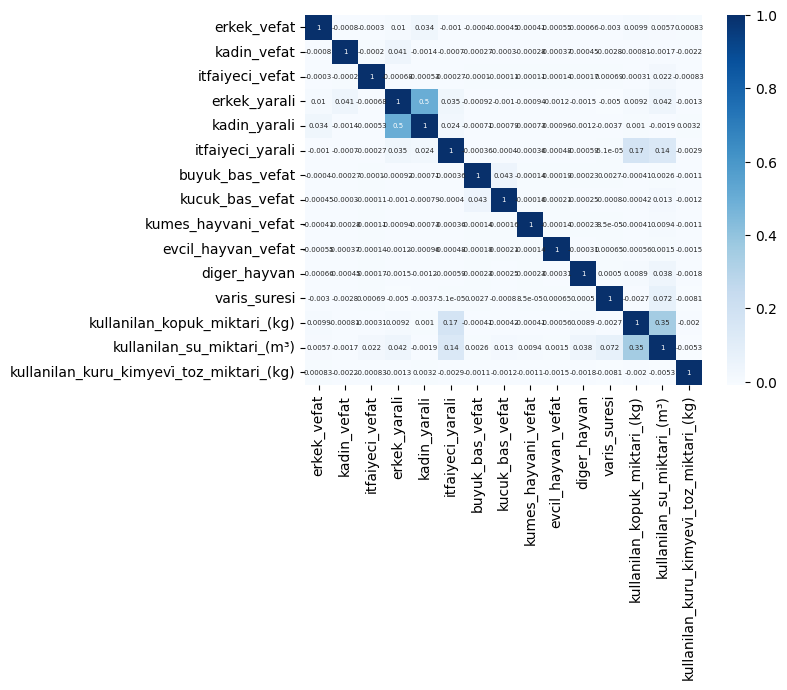

In [10]:
sns.heatmap(dataset_num.corr(), annot=True, cmap="Blues", annot_kws={"size": 5})
plt.show()

In [11]:
cat_data = dataset.select_dtypes(include=['object'])
cat_data.head()

,yangin_turu,yangin_sebebi̇,yangin_sonucu,yapi_sekli,ilce,adres_bolgesi
0,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,KARABAĞLAR,KENT MERKEZİ
1,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,KONAK,KENT MERKEZİ
2,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,KONAK,KENT MERKEZİ
3,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,BORNOVA,KENT MERKEZİ
4,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,URLA,KENT MERKEZİ


In [12]:
cat_data.columns

Index(['yangin_turu', 'yangin_sebebi̇', 'yangin_sonucu', 'yapi_sekli', 'ilce',
       'adres_bolgesi'],
      dtype='object')

* After the examination of numerical variables, categorical data was investigated.

In [13]:
cat_relation = cat_data[["yangin_turu", "yangin_sebebi̇", "yangin_sonucu"]]



In [14]:
cat_relation

,yangin_turu,yangin_sebebi̇,yangin_sonucu
0,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN
1,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN
2,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN
3,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN
4,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN
...,...,...,...
12981,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN
12982,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN
12983,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN
12984,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN


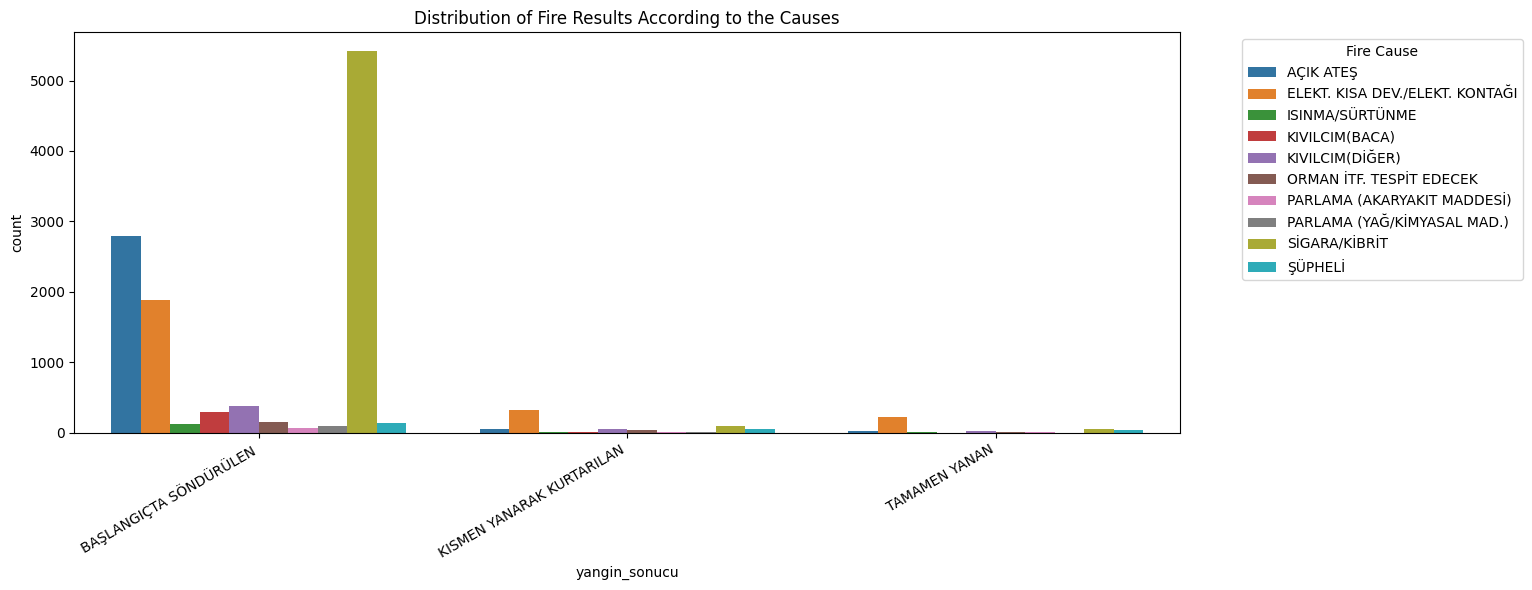

In [15]:
grouped_result = cat_relation.groupby(["yangin_sonucu", "yangin_sebebi̇"]).size().reset_index(name="count")
top_causes = grouped_result.groupby("yangin_sebebi̇")["count"].sum().nlargest(10).index
filtered_data = grouped_result[grouped_result["yangin_sebebi̇"].isin(top_causes)]
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x="yangin_sonucu", y="count", hue="yangin_sebebi̇")
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of Fire Results According to the Causes")
plt.tight_layout()
plt.legend(title="Fire Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
dataset.columns.tolist()

['tarih',
 'yangin_turu',
 'yangin_sebebi̇',
 'yangin_sonucu',
 'yapi_sekli',
 'erkek_vefat',
 'kadin_vefat',
 'itfaiyeci_vefat',
 'erkek_yarali',
 'kadin_yarali',
 'itfaiyeci_yarali',
 'buyuk_bas_vefat',
 'kucuk_bas_vefat',
 'kumes_hayvani_vefat',
 'evcil_hayvan_vefat',
 'diger_hayvan',
 'varis_suresi',
 'kullanilan_kopuk_miktari_(kg)',
 'kullanilan_su_miktari_(m³)',
 'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)',
 'ekipleri̇n_cikis_saati',
 'ilce',
 'adres_bolgesi']

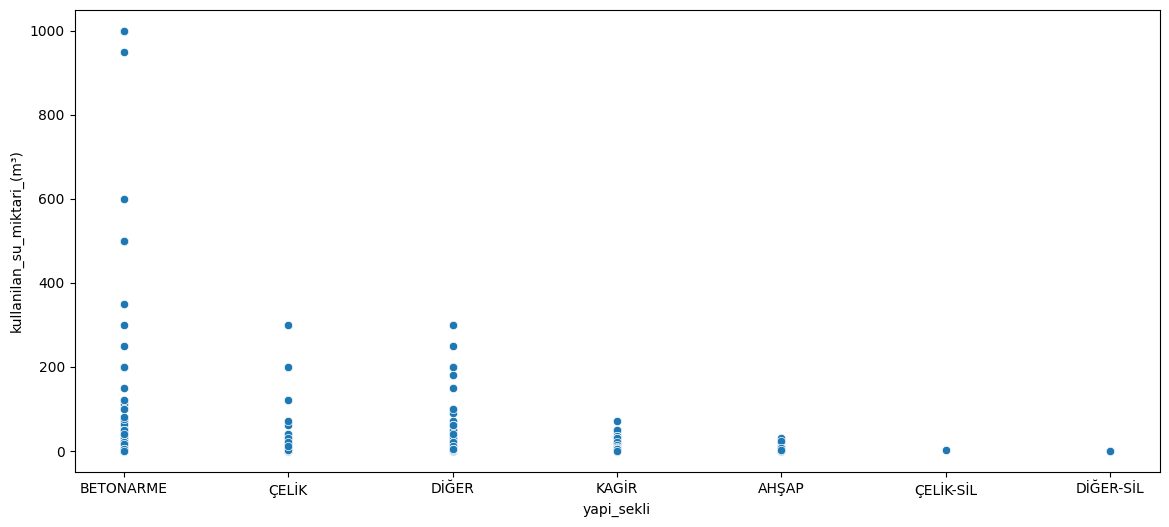

In [17]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data = dataset, x="yapi_sekli", y="kullanilan_su_miktari_(m³)")
plt.show()

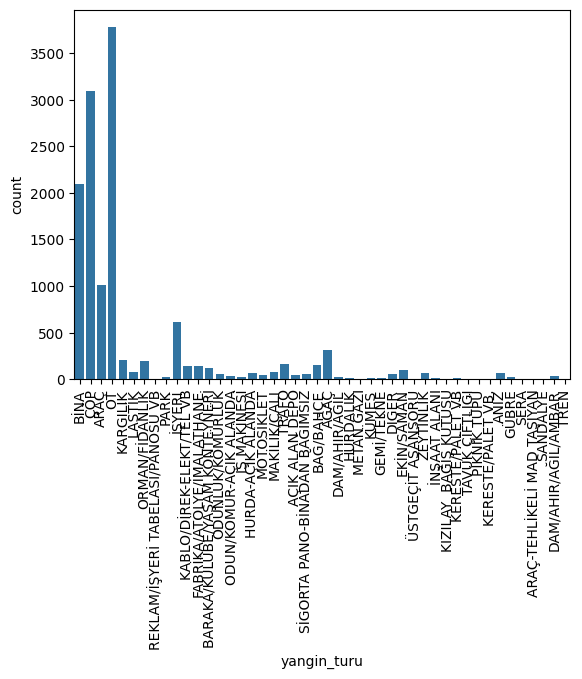

In [18]:
sns.countplot(x="yangin_turu", data=dataset)
plt.xticks(rotation=90)
plt.show()

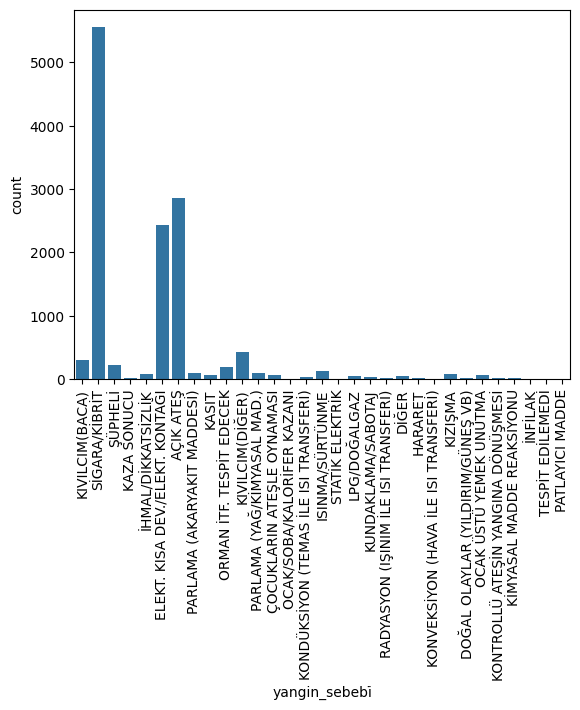

In [19]:
sns.countplot(x="yangin_sebebi̇", data=cat_data)
plt.xticks(rotation=90)
plt.show()

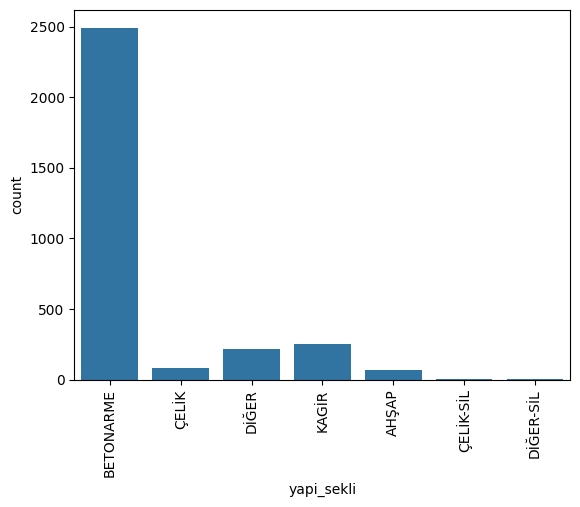

In [20]:
sns.countplot(x="yapi_sekli", data=dataset)
plt.xticks(rotation=90)
plt.show()

* Some features such as month, and day of week edited to process with correct data types.
* A season column added to dataset, to classify months.

In [21]:
dataset["month"] = pd.to_datetime(dataset["tarih"], errors="coerce").dt.month
dataset["day_of_week"] = pd.to_datetime(dataset["tarih"], errors = "coerce").dt.dayofweek
dataset["season"] = dataset["month"].apply(lambda x: "Winter" if x in [12, 1, 2] else ("Spring" if x in [3, 4, 5] else ("Summer" if x in [6, 7, 8] else "Autumn")))
dataset

,tarih,yangin_turu,yangin_sebebi̇,yangin_sonucu,yapi_sekli,erkek_vefat,kadin_vefat,itfaiyeci_vefat,erkek_yarali,kadin_yarali,...,varis_suresi,kullanilan_kopuk_miktari_(kg),kullanilan_su_miktari_(m³),kullanilan_kuru_kimyevi̇_toz_miktari_(kg),ekipleri̇n_cikis_saati,ilce,adres_bolgesi,month,day_of_week,season
0,2023-01-01,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,4.0,0.0,1.0,0.0,2025-06-04 00:18:00,KARABAĞLAR,KENT MERKEZİ,1,6,Winter
1,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,3.0,0.0,0.5,0.0,2025-06-04 01:38:00,KONAK,KENT MERKEZİ,1,6,Winter
2,2023-01-01,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,2.0,0.0,0.0,0.0,2025-06-04 01:50:00,KONAK,KENT MERKEZİ,1,6,Winter
3,2023-01-01,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,4.0,0.0,2.0,0.0,2025-06-04 02:02:00,BORNOVA,KENT MERKEZİ,1,6,Winter
4,2023-01-01,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,6.0,0.0,0.4,0.0,2025-06-04 02:24:00,URLA,KENT MERKEZİ,1,6,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12981,2023-12-31,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,NaN,0.0,0.2,0.0,2025-06-04 22:15:00,BORNOVA,KENT MERKEZİ,12,6,Winter
12982,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,NaN,0.0,0.0,0.0,2025-06-04 22:14:00,URLA,KIRSAL BÖLGE,12,6,Winter
12983,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,NaN,0.0,5.0,0.0,2025-06-04 23:04:00,KARABAĞLAR,KENT MERKEZİ,12,6,Winter
12984,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,NaN,0.0,0.0,6.0,2025-06-04 22:47:00,SEFERİHİSAR,KIRSAL BÖLGE,12,6,Winter


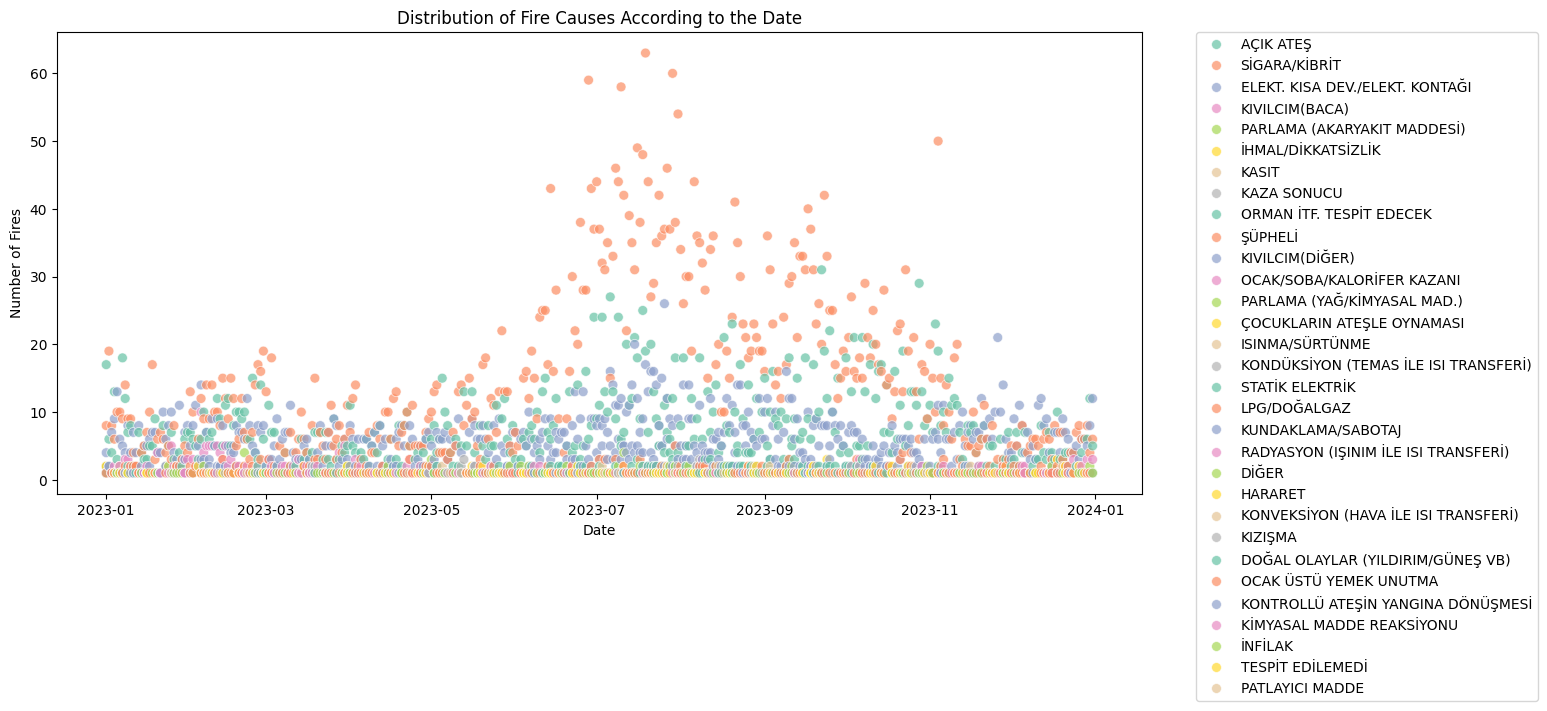

In [22]:
dataset["tarih"] = pd.to_datetime(dataset["tarih"])
plt.figure(figsize=(14, 6))
date_reason = dataset.groupby("tarih")["yangin_sebebi̇"].value_counts().reset_index(name="count")
sns.scatterplot(data=date_reason, x="tarih", y="count", hue="yangin_sebebi̇", s=50, alpha=0.7, palette="Set2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Distribution of Fire Causes According to the Date")
plt.xlabel("Date")
plt.ylabel("Number of Fires")

plt.show()


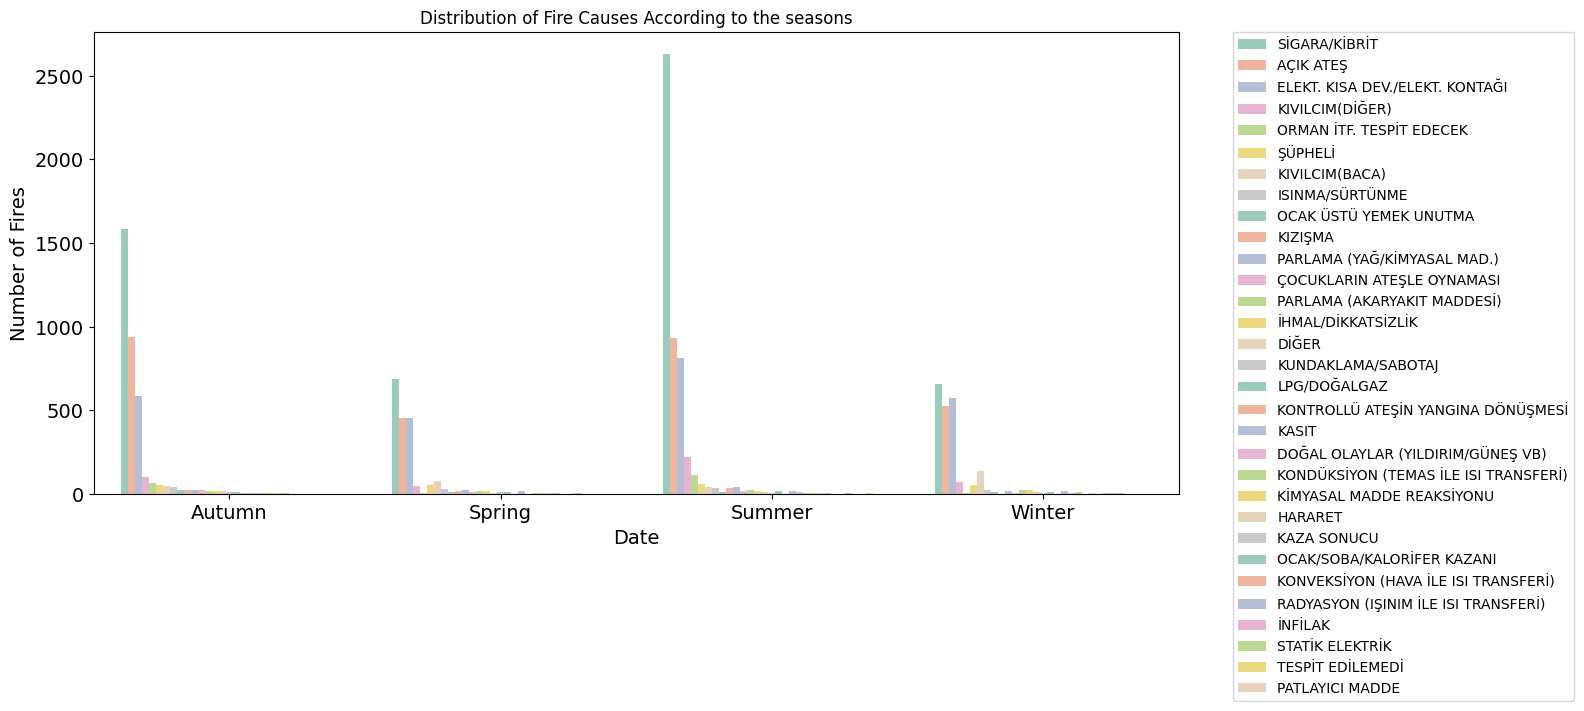

In [23]:

plt.figure(figsize=(14, 6))
season_reason = dataset.groupby("season")["yangin_sebebi̇"].value_counts().reset_index(name="count")
sns.barplot(data=season_reason, x="season", y="count", hue="yangin_sebebi̇", alpha=0.7, palette="Set2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Distribution of Fire Causes According to the seasons")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.show()

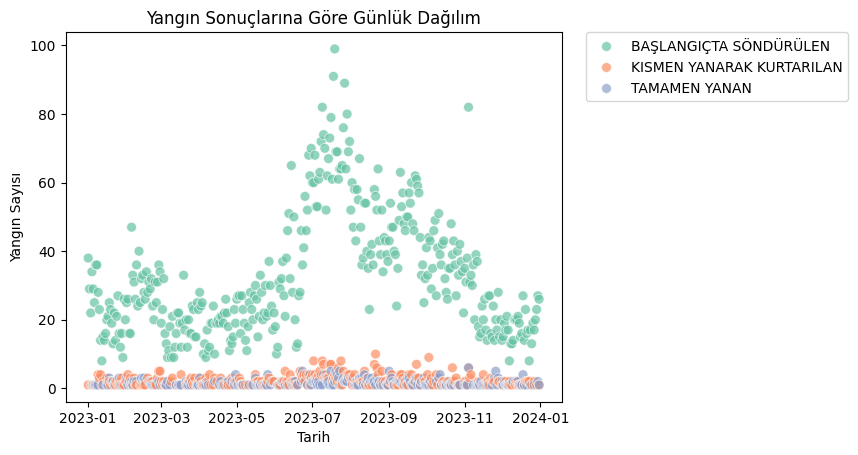

In [24]:
date_result = dataset.groupby("tarih")["yangin_sonucu"].value_counts().reset_index(name="count")
sns.scatterplot(data=date_result, x="tarih", y="count", hue="yangin_sonucu", s=50, alpha=0.7, palette="Set2")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Yangın Sonuçlarına Göre Günlük Dağılım")
plt.xlabel("Tarih")
plt.ylabel("Yangın Sayısı")

plt.show()

In [25]:
dataset.columns.tolist()

['tarih',
 'yangin_turu',
 'yangin_sebebi̇',
 'yangin_sonucu',
 'yapi_sekli',
 'erkek_vefat',
 'kadin_vefat',
 'itfaiyeci_vefat',
 'erkek_yarali',
 'kadin_yarali',
 'itfaiyeci_yarali',
 'buyuk_bas_vefat',
 'kucuk_bas_vefat',
 'kumes_hayvani_vefat',
 'evcil_hayvan_vefat',
 'diger_hayvan',
 'varis_suresi',
 'kullanilan_kopuk_miktari_(kg)',
 'kullanilan_su_miktari_(m³)',
 'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)',
 'ekipleri̇n_cikis_saati',
 'ilce',
 'adres_bolgesi',
 'month',
 'day_of_week',
 'season']

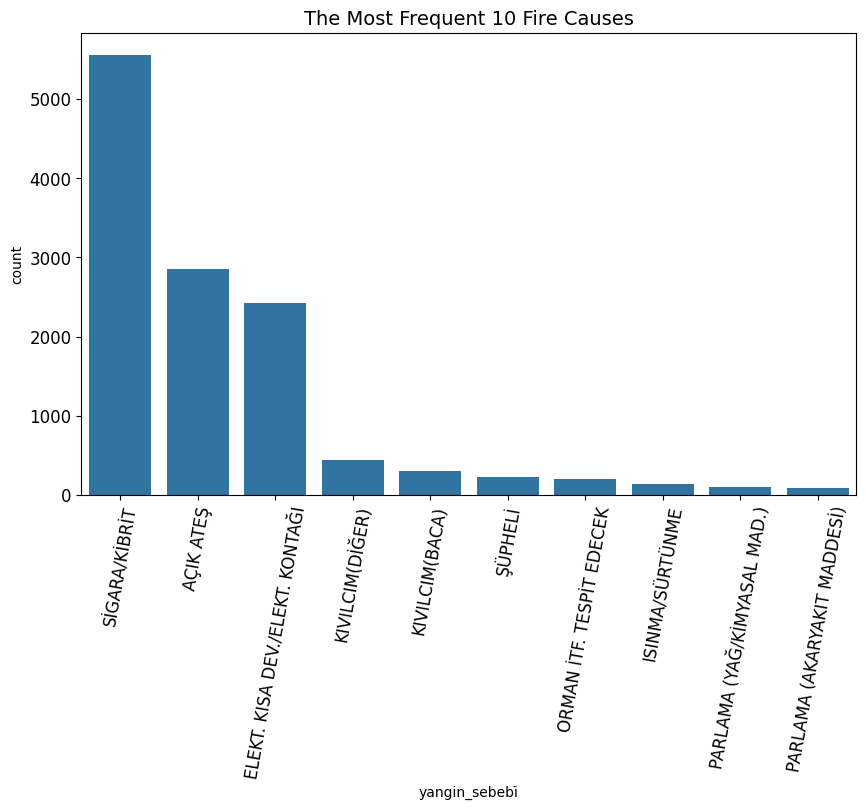

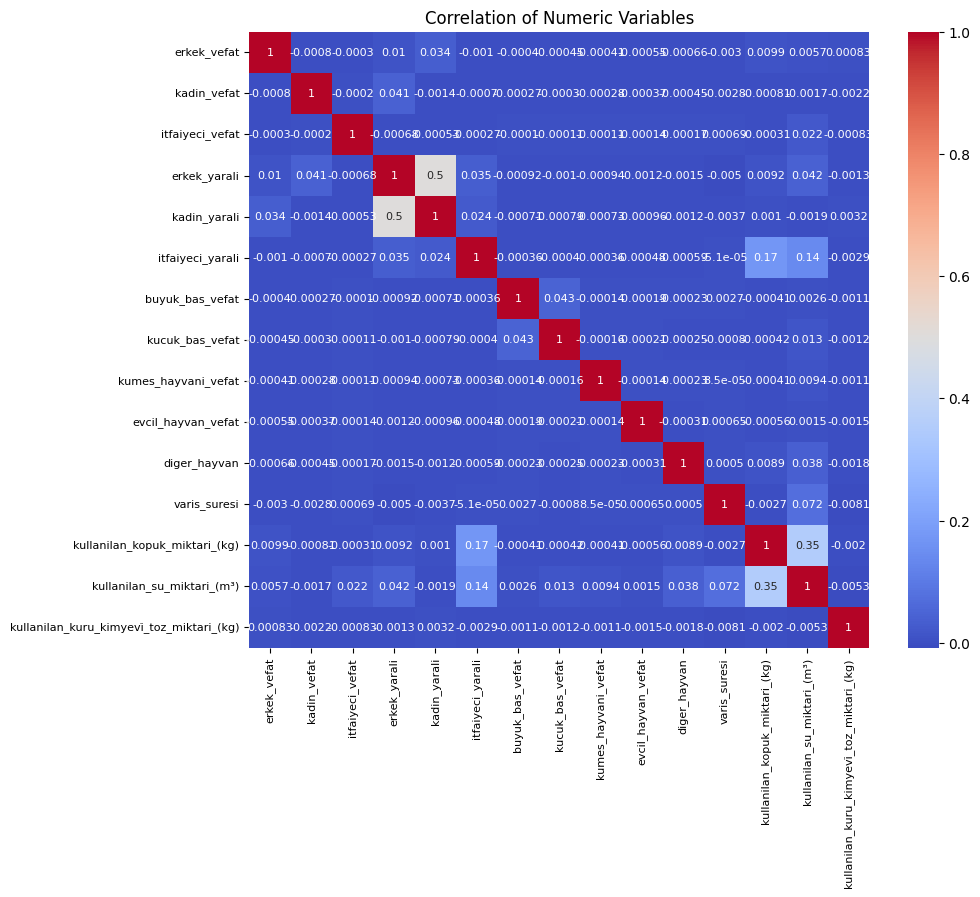

In [26]:
grouped_result = cat_relation.groupby(["yangin_sebebi̇"]).size().reset_index(name="count")
sorted_filtered_data = grouped_result.sort_values(by="count", ascending=False)
sorted_filtered_data = sorted_filtered_data.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_filtered_data, x="yangin_sebebi̇", y="count")
plt.xticks(rotation=80)
plt.title("The Most Frequent 10 Fire Causes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(dataset_num.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title("Correlation of Numeric Variables")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [27]:
dataset.columns

Index(['tarih', 'yangin_turu', 'yangin_sebebi̇', 'yangin_sonucu', 'yapi_sekli',
       'erkek_vefat', 'kadin_vefat', 'itfaiyeci_vefat', 'erkek_yarali',
       'kadin_yarali', 'itfaiyeci_yarali', 'buyuk_bas_vefat',
       'kucuk_bas_vefat', 'kumes_hayvani_vefat', 'evcil_hayvan_vefat',
       'diger_hayvan', 'varis_suresi', 'kullanilan_kopuk_miktari_(kg)',
       'kullanilan_su_miktari_(m³)',
       'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)', 'ekipleri̇n_cikis_saati',
       'ilce', 'adres_bolgesi', 'month', 'day_of_week', 'season'],
      dtype='object')

In [28]:
dataset["total_fatality"] = dataset["erkek_vefat"] + dataset['kadin_vefat'] + dataset["itfaiyeci_vefat"]
dataset["total_injury"] = dataset["erkek_yarali"] + dataset['kadin_yarali'] + dataset["itfaiyeci_yarali"]
dataset["total_animal_loss"] = dataset["buyuk_bas_vefat"] + dataset['kucuk_bas_vefat'] + dataset["kumes_hayvani_vefat"] + dataset["evcil_hayvan_vefat"] + dataset["diger_hayvan"]
dataset["total_animal_loss"]

,total_animal_loss
0,0
1,0
2,0
3,0
4,0
...,...
12981,0
12982,0
12983,0
12984,0


In [29]:
dataset["month"] = pd.to_datetime(dataset["tarih"], errors="coerce").dt.month
dataset["day_of_week"] = pd.to_datetime(dataset["tarih"], errors = "coerce").dt.dayofweek
dataset["season"] = dataset["month"].apply(lambda x: "Winter" if x in [12, 1, 2] else ("Spring" if x in [3, 4, 5] else ("Summer" if x in [6, 7, 8] else "Autumn")))
dataset

,tarih,yangin_turu,yangin_sebebi̇,yangin_sonucu,yapi_sekli,erkek_vefat,kadin_vefat,itfaiyeci_vefat,erkek_yarali,kadin_yarali,...,kullanilan_kuru_kimyevi̇_toz_miktari_(kg),ekipleri̇n_cikis_saati,ilce,adres_bolgesi,month,day_of_week,season,total_fatality,total_injury,total_animal_loss
0,2023-01-01,BİNA,KIVILCIM(BACA),BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0.0,2025-06-04 00:18:00,KARABAĞLAR,KENT MERKEZİ,1,6,Winter,0,0,0
1,2023-01-01,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0.0,2025-06-04 01:38:00,KONAK,KENT MERKEZİ,1,6,Winter,0,0,0
2,2023-01-01,BİNA,ŞÜPHELİ,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0.0,2025-06-04 01:50:00,KONAK,KENT MERKEZİ,1,6,Winter,0,0,0
3,2023-01-01,ARAÇ,KAZA SONUCU,KISMEN YANARAK KURTARILAN,NaN,0,0,0,0,0,...,0.0,2025-06-04 02:02:00,BORNOVA,KENT MERKEZİ,1,6,Winter,0,0,0
4,2023-01-01,ARAÇ,İHMAL/DİKKATSİZLİK,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,2,0,...,0.0,2025-06-04 02:24:00,URLA,KENT MERKEZİ,1,6,Winter,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12981,2023-12-31,ÇÖP,SİGARA/KİBRİT,BAŞLANGIÇTA SÖNDÜRÜLEN,NaN,0,0,0,0,0,...,0.0,2025-06-04 22:15:00,BORNOVA,KENT MERKEZİ,12,6,Winter,0,0,0
12982,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0.0,2025-06-04 22:14:00,URLA,KIRSAL BÖLGE,12,6,Winter,0,0,0
12983,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,0.0,2025-06-04 23:04:00,KARABAĞLAR,KENT MERKEZİ,12,6,Winter,0,0,0
12984,2023-12-31,BİNA,ELEKT. KISA DEV./ELEKT. KONTAĞI,BAŞLANGIÇTA SÖNDÜRÜLEN,BETONARME,0,0,0,0,0,...,6.0,2025-06-04 22:47:00,SEFERİHİSAR,KIRSAL BÖLGE,12,6,Winter,0,0,0


To answer the first research question, fire outcome was classifed as low, moderate, and high, based on the time/speed of fire response.

In [30]:
dataset["fire_outcome_severity"] = dataset['yangin_sonucu'].apply(lambda x: 'low' if str(x).strip().upper() == 'BAŞLANGIÇTA SÖNDÜRÜLEN' else ("moderate" if str(x).strip().upper() == 'KISMEN YANARAK KURTARILAN' else "high"))

In [31]:
type_outcome = dataset.groupby(["yapi_sekli"])["fire_outcome_severity"].value_counts()
type_outcome

yapi_sekli  fire_outcome_severity
AHŞAP       low                        37
            high                       27
            moderate                    7
BETONARME   low                      2371
            moderate                   97
            high                       26
DİĞER       low                       134
            high                       46
            moderate                   38
DİĞER-SİL   low                         2
KAGİR       low                       170
            moderate                   55
            high                       24
ÇELİK       low                        59
            moderate                   13
            high                        9
ÇELİK-SİL   moderate                    1
Name: count, dtype: int64

<Axes: xlabel='yapi_sekli'>

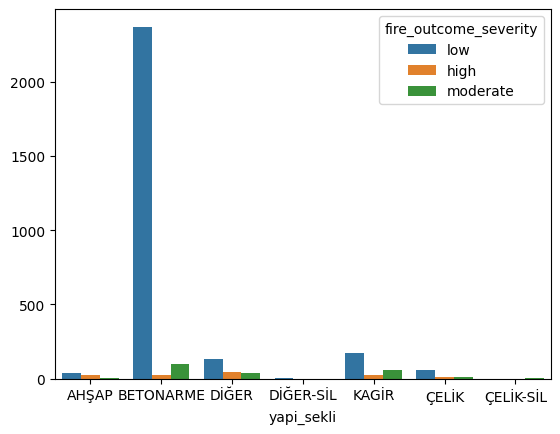

In [32]:
sns.barplot(x=type_outcome.index.get_level_values(0), y=type_outcome.values, hue=type_outcome.index.get_level_values(1))

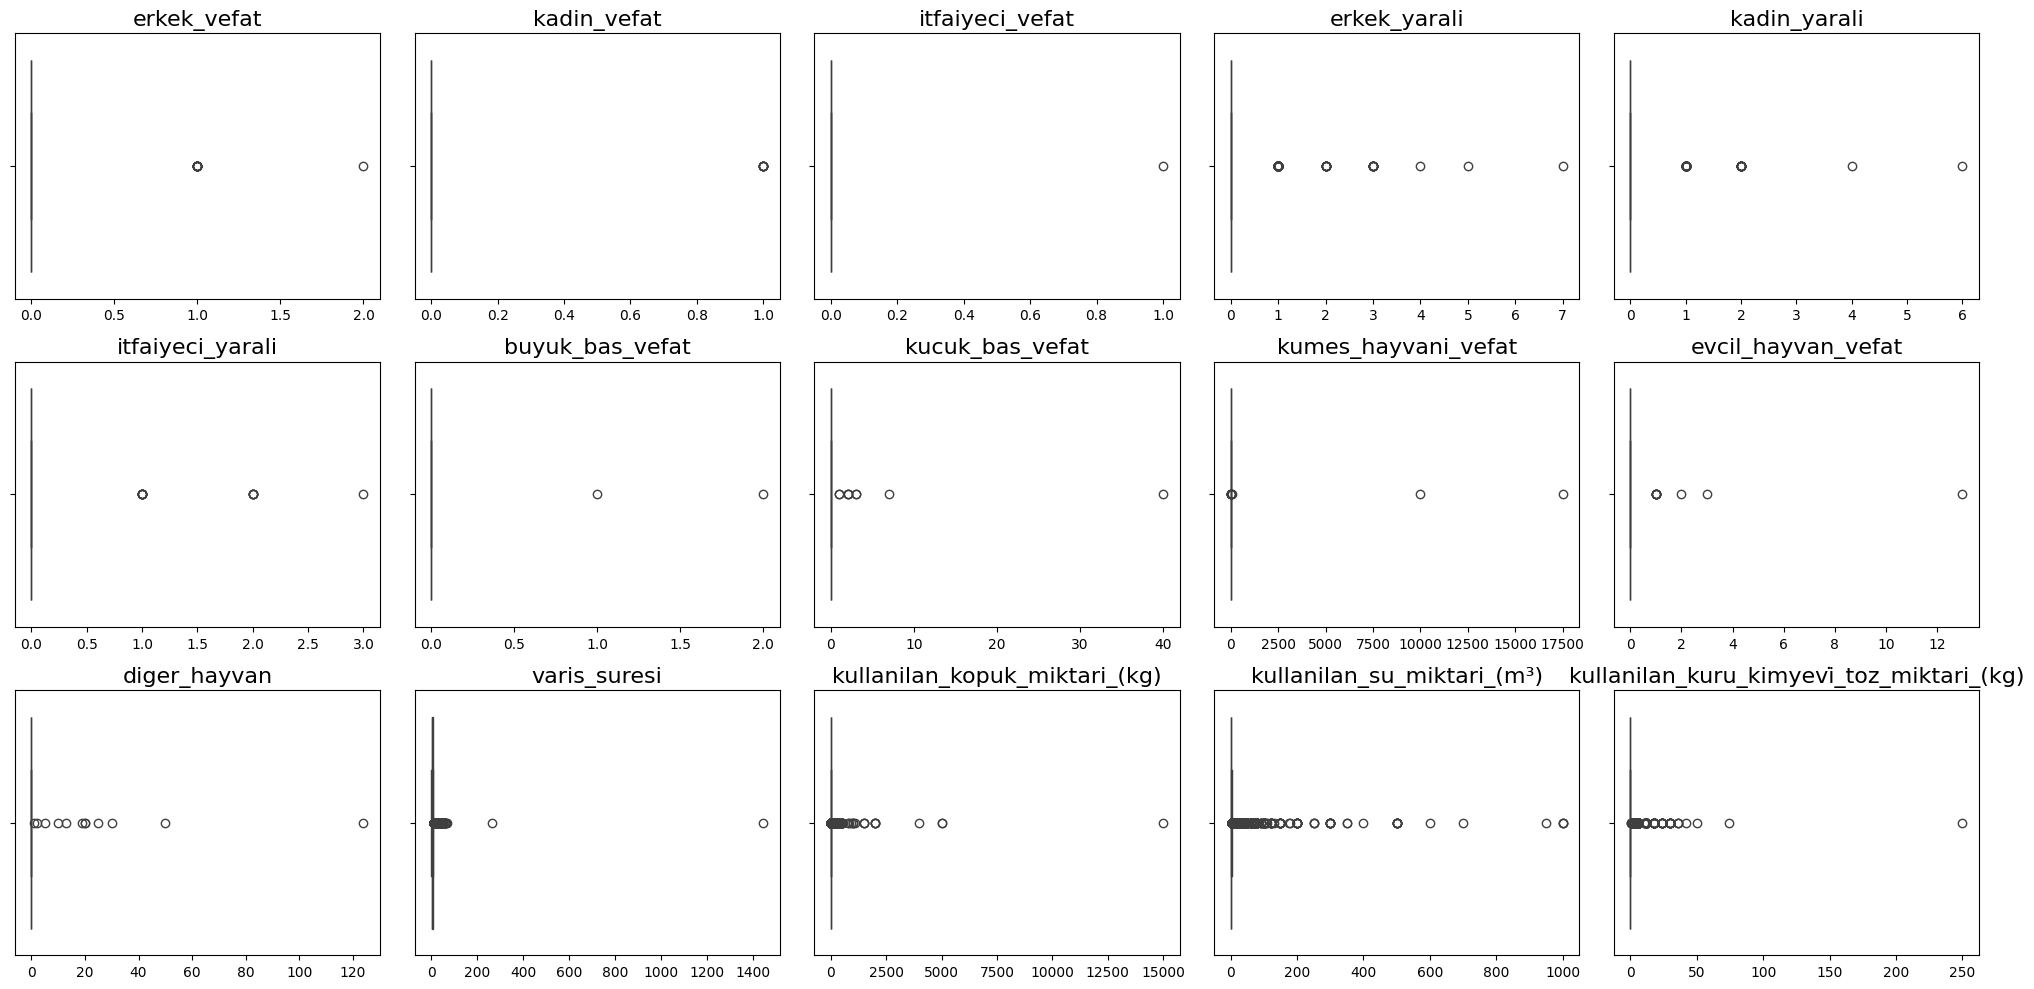

In [33]:
fig, axes = plt.subplots(3,5 , figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(dataset_num):
  if i < len(axes):
    sns.boxplot(data=dataset_num, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel("", fontsize=3)
  else:
    break

plt.tight_layout()
plt.show()

## 2. Handling Missing Data

* To handle the missing data in dataset, different imputers were used. For the varis_suresi median imputer was used while KNN imputer was used for the kullanilan_su_miktari_(m³).
* Since yapi_sekli column included too many missing data, and it is difficult to impute such data withouth any additional information, entire column was dropped to prevent bias in the further processes.  

In [34]:
Q1 = dataset["varis_suresi"].quantile(0.25)
Q3 = dataset["varis_suresi"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
dataset["varis_suresi"] = np.where(dataset["varis_suresi"] > upper_limit, upper_limit, dataset["varis_suresi"])
dataset["varis_suresi"] = dataset["varis_suresi"].fillna(dataset["varis_suresi"].median())


In [35]:

dataset_impute = dataset[["kullanilan_su_miktari_(m³)", "kullanilan_kopuk_miktari_(kg)", "kullanilan_kuru_kimyevi̇_toz_miktari_(kg)"]].copy()
scaler = StandardScaler()
scaled_values = scaler.fit_transform(dataset_impute)

imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_values)

imputed_dataset = pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=["kullanilan_su_miktari_(m³)", "kullanilan_kopuk_miktari_(kg)", "kullanilan_kuru_kimyevi̇_toz_miktari_(kg)"])

dataset.loc[dataset['kullanilan_su_miktari_(m³)'].isnull(), 'kullanilan_su_miktari_(m³)'] = imputed_dataset.loc[dataset['kullanilan_su_miktari_(m³)'].isnull(), 'kullanilan_su_miktari_(m³)']


In [36]:
log_columns = [
    'kullanilan_su_miktari_(m³)',
    'kullanilan_kopuk_miktari_(kg)',
    'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)',
    'total_animal_loss'
]

for col in log_columns:
    dataset[f'logscale_{col}'] = np.log1p(dataset[col])


encoder = OrdinalEncoder()
dataset["fire_severity_encoded"] = encoder.fit_transform(dataset[["fire_outcome_severity"]])


dataset[["varis_suresi", "logscale_kullanilan_su_miktari_(m³)", "logscale_total_animal_loss", "fire_outcome_severity", "fire_severity_encoded"]].head()

,varis_suresi,logscale_kullanilan_su_miktari_(m³),logscale_total_animal_loss,fire_outcome_severity,fire_severity_encoded
0,4.0,0.693147,0.0,low,1.0
1,3.0,0.405465,0.0,low,1.0
2,2.0,0.000000,0.0,low,1.0
3,4.0,1.098612,0.0,moderate,2.0
4,6.0,0.336472,0.0,low,1.0


In [37]:
dataset.drop("yapi_sekli", inplace=True, axis=1)

In [38]:
dataset.isna().sum()

,0
tarih,0
yangin_turu,0
yangin_sebebi̇,0
yangin_sonucu,0
erkek_vefat,0
kadin_vefat,0
itfaiyeci_vefat,0
erkek_yarali,0
kadin_yarali,0
itfaiyeci_yarali,0


## 3. Feature Importance -1

* After missing data handled, to see which features are important for the further tasks in the scope of the study, Random Forest Classifier was used. In this step, to prevent data leakage, dataset divided into test and train data.

In [39]:


X_all = dataset.drop(['yangin_sonucu', 'fire_outcome_severity', 'fire_severity_encoded', 'tarih', 'ekipleri̇n_cikis_saati'], axis=1)
y_all = dataset['fire_severity_encoded']


encoder = LabelEncoder()


categorical_features = X_all.select_dtypes(include=['object']).columns


for feature in categorical_features:
    X_all[feature] = encoder.fit_transform(X_all[feature])

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=2543460)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_features = X_all.columns[np.argsort(importances)[::-1]]


y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.22      0.29        82
         1.0       0.94      0.99      0.97      2377
         2.0       0.48      0.22      0.30       139

    accuracy                           0.92      2598
   macro avg       0.61      0.48      0.52      2598
weighted avg       0.90      0.92      0.91      2598



                                              Feature  Importance
0                                         yangin_turu    0.192464
25                logscale_kullanilan_su_miktari_(m³)    0.115545
15                         kullanilan_su_miktari_(m³)    0.114556
17                                               ilce    0.109614
1                                      yangin_sebebi̇    0.091855
13                                       varis_suresi    0.081971
20                                        day_of_week    0.079144
19                                              month    0.075128
21                                             season    0.036370
26             logscale_kullanilan_kopuk_miktari_(kg)    0.021341
14                      kullanilan_kopuk_miktari_(kg)    0.019515
18                                      adres_bolgesi    0.018881
27  logscale_kullanilan_kuru_kimyevi̇_toz_miktari_...    0.008983
16          kullanilan_kuru_kimyevi̇_toz_miktari_(kg)    0.007910
23        

<ipython-input-40-d1bde00e62ac>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


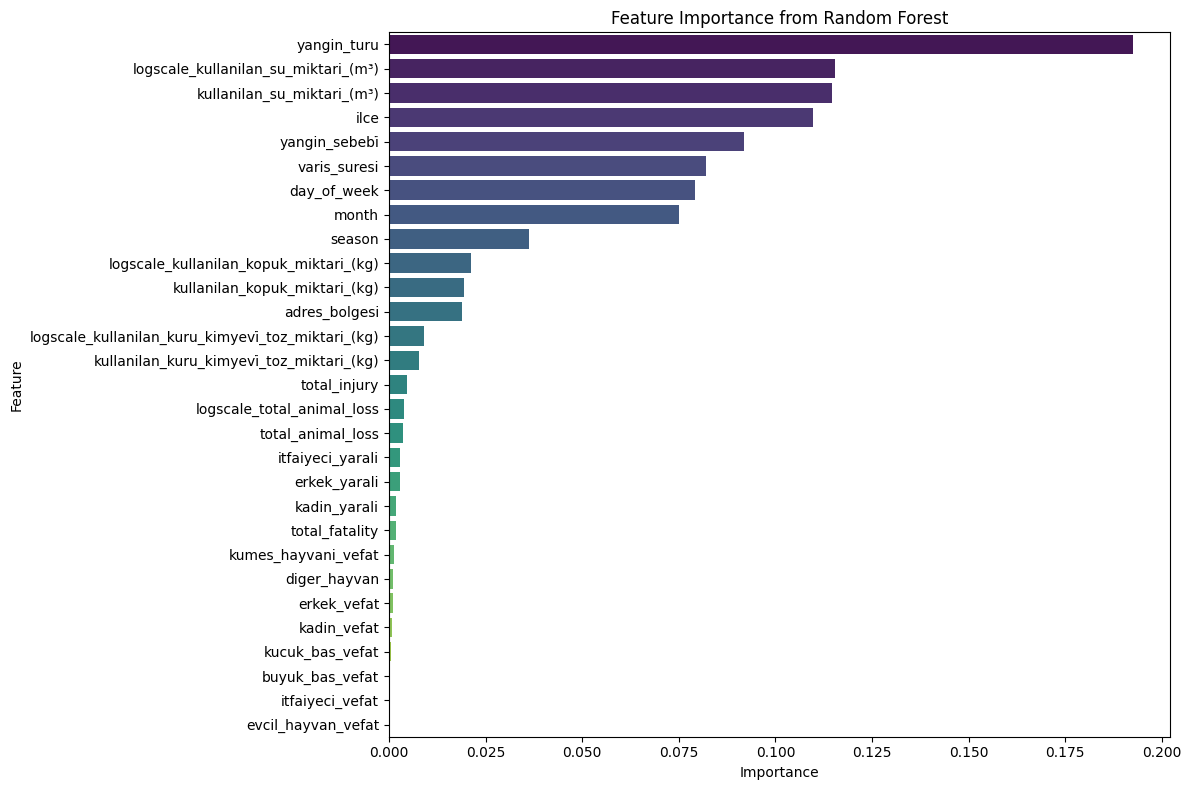

In [40]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

* According to the Random Forest Feature Importance results, most important features were found as yangin_turu, kullanilan_su_miktari_(m³), ilce, yangin_sebebi̇, varis_suresi, day_of_week, month, and season.

## 4. Research Question-1: Statistical Analyses

* To answer the first research question, which is "Does the average arrival time change significantly in different seasonal periods of the year, different address areas, and different fire causes?";
  * 3 subquestions were asked:
      1. Does the average arrival time change significantly in different seasonal periods of the year?
      2. Does the average arrival time change significantly in different address areas?
      3. Does the average arrival time change significantly in different different fire causes?
  - First of all, distribution of the variables were checked with Shapiro-Wilk test.

In [41]:
dataset["varis_suresi"].isna().sum()

np.int64(0)

In [42]:
dataset.columns

Index(['tarih', 'yangin_turu', 'yangin_sebebi̇', 'yangin_sonucu',
       'erkek_vefat', 'kadin_vefat', 'itfaiyeci_vefat', 'erkek_yarali',
       'kadin_yarali', 'itfaiyeci_yarali', 'buyuk_bas_vefat',
       'kucuk_bas_vefat', 'kumes_hayvani_vefat', 'evcil_hayvan_vefat',
       'diger_hayvan', 'varis_suresi', 'kullanilan_kopuk_miktari_(kg)',
       'kullanilan_su_miktari_(m³)',
       'kullanilan_kuru_kimyevi̇_toz_miktari_(kg)', 'ekipleri̇n_cikis_saati',
       'ilce', 'adres_bolgesi', 'month', 'day_of_week', 'season',
       'total_fatality', 'total_injury', 'total_animal_loss',
       'fire_outcome_severity', 'logscale_kullanilan_su_miktari_(m³)',
       'logscale_kullanilan_kopuk_miktari_(kg)',
       'logscale_kullanilan_kuru_kimyevi̇_toz_miktari_(kg)',
       'logscale_total_animal_loss', 'fire_severity_encoded'],
      dtype='object')

In [43]:

factors = ["season", "adres_bolgesi", "yangin_sebebi̇"]

shapiro_results = {}

for factor in factors:
    shapiro_results[factor] = {}
    for group, data in dataset.groupby(factor)['varis_suresi']:
        if len(data) >= 3:
            sample = data.sample(n=min(5000, len(data)), random_state=42)
            stat, p = shapiro(sample)
            shapiro_results[factor][group] = {
                'W-statistic': round(stat, 4),
                'p-value': round(p, 4),
                'n': len(sample)
            }

shapiro_results

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


{'season': {'Autumn': {'W-statistic': np.float64(0.8939),
   'p-value': np.float64(0.0),
   'n': 3636},
  'Spring': {'W-statistic': np.float64(0.8669),
   'p-value': np.float64(0.0),
   'n': 2010},
  'Summer': {'W-statistic': np.float64(0.8957),
   'p-value': np.float64(0.0),
   'n': 5000},
  'Winter': {'W-statistic': np.float64(0.8534),
   'p-value': np.float64(0.0),
   'n': 2241}},
 'adres_bolgesi': {'KENT MERKEZİ': {'W-statistic': np.float64(0.8909),
   'p-value': np.float64(0.0),
   'n': 5000},
  'KIRSAL BÖLGE': {'W-statistic': np.float64(0.8768),
   'p-value': np.float64(0.0),
   'n': 3403},
  'İL DIŞI': {'W-statistic': np.float64(1.0),
   'p-value': np.float64(1.0),
   'n': 6}},
 'yangin_sebebi̇': {'AÇIK ATEŞ': {'W-statistic': np.float64(0.9042),
   'p-value': np.float64(0.0),
   'n': 2857},
  'DOĞAL OLAYLAR (YILDIRIM/GÜNEŞ VB)': {'W-statistic': np.float64(0.8844),
   'p-value': np.float64(0.0176),
   'n': 21},
  'DİĞER': {'W-statistic': np.float64(0.8827),
   'p-value': np.float

In [44]:
flat_data = []

for factor, groups in shapiro_results.items():
    for group, values in groups.items():
        flat_data.append({
            "Group Variable": factor,
            "Group Name": group,
            "W-statistic": float(values["W-statistic"]),
            "p-value": float(values["p-value"]),
            "Sample Size": values["n"],
            "Normality": "Not Normal" if values["p-value"] < 0.05 else "Normal"
        })

# Create DataFrame
shapiro_df = pd.DataFrame(flat_data)

# Sort and display
shapiro_df = shapiro_df.sort_values(by=["Group Variable", "Group Name"]).reset_index(drop=True)
display(shapiro_df)

,Group Variable,Group Name,W-statistic,p-value,Sample Size,Normality
0,adres_bolgesi,KENT MERKEZİ,0.8909,0.0000,5000,Not Normal
1,adres_bolgesi,KIRSAL BÖLGE,0.8768,0.0000,3403,Not Normal
2,adres_bolgesi,İL DIŞI,1.0000,1.0000,6,Normal
3,season,Autumn,0.8939,0.0000,3636,Not Normal
4,season,Spring,0.8669,0.0000,2010,Not Normal
5,season,Summer,0.8957,0.0000,5000,Not Normal
6,season,Winter,0.8534,0.0000,2241,Not Normal
7,yangin_sebebi̇,AÇIK ATEŞ,0.9042,0.0000,2857,Not Normal
8,yangin_sebebi̇,DOĞAL OLAYLAR (YILDIRIM/GÜNEŞ VB),0.8844,0.0176,21,Not Normal
9,yangin_sebebi̇,DİĞER,0.8827,0.0003,44,Not Normal


QQ Plots for 'season' grouped by 'varis_suresi'


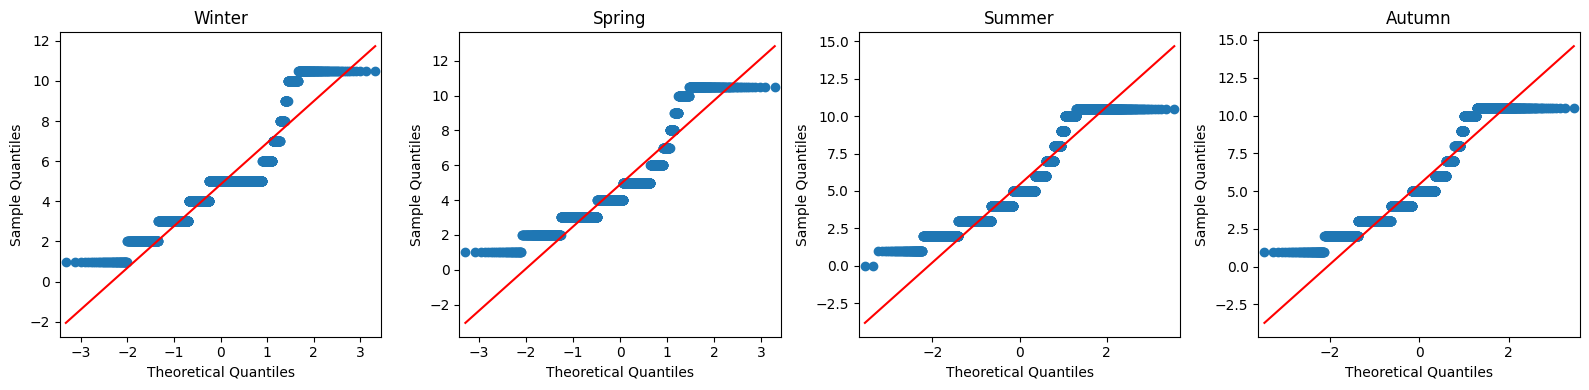

QQ Plots for 'adres_bolgesi' grouped by 'varis_suresi'


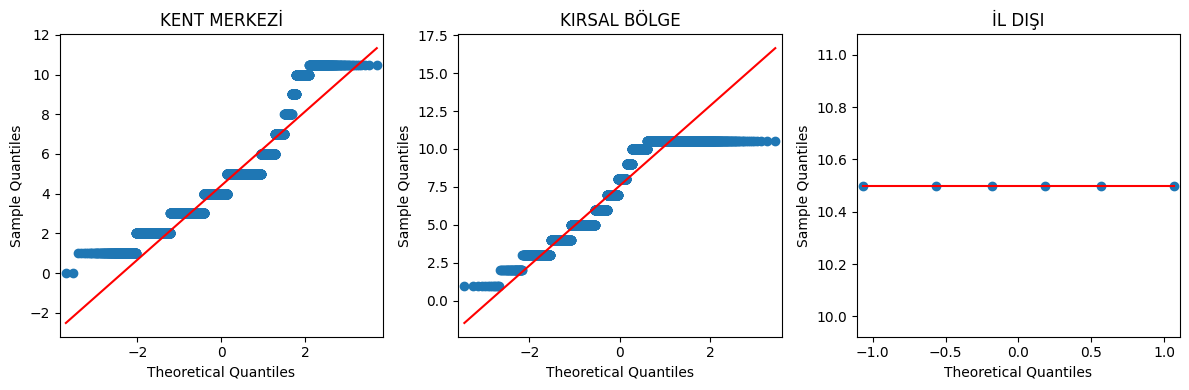

QQ Plots for 'yangin_sebebi̇' grouped by 'varis_suresi'


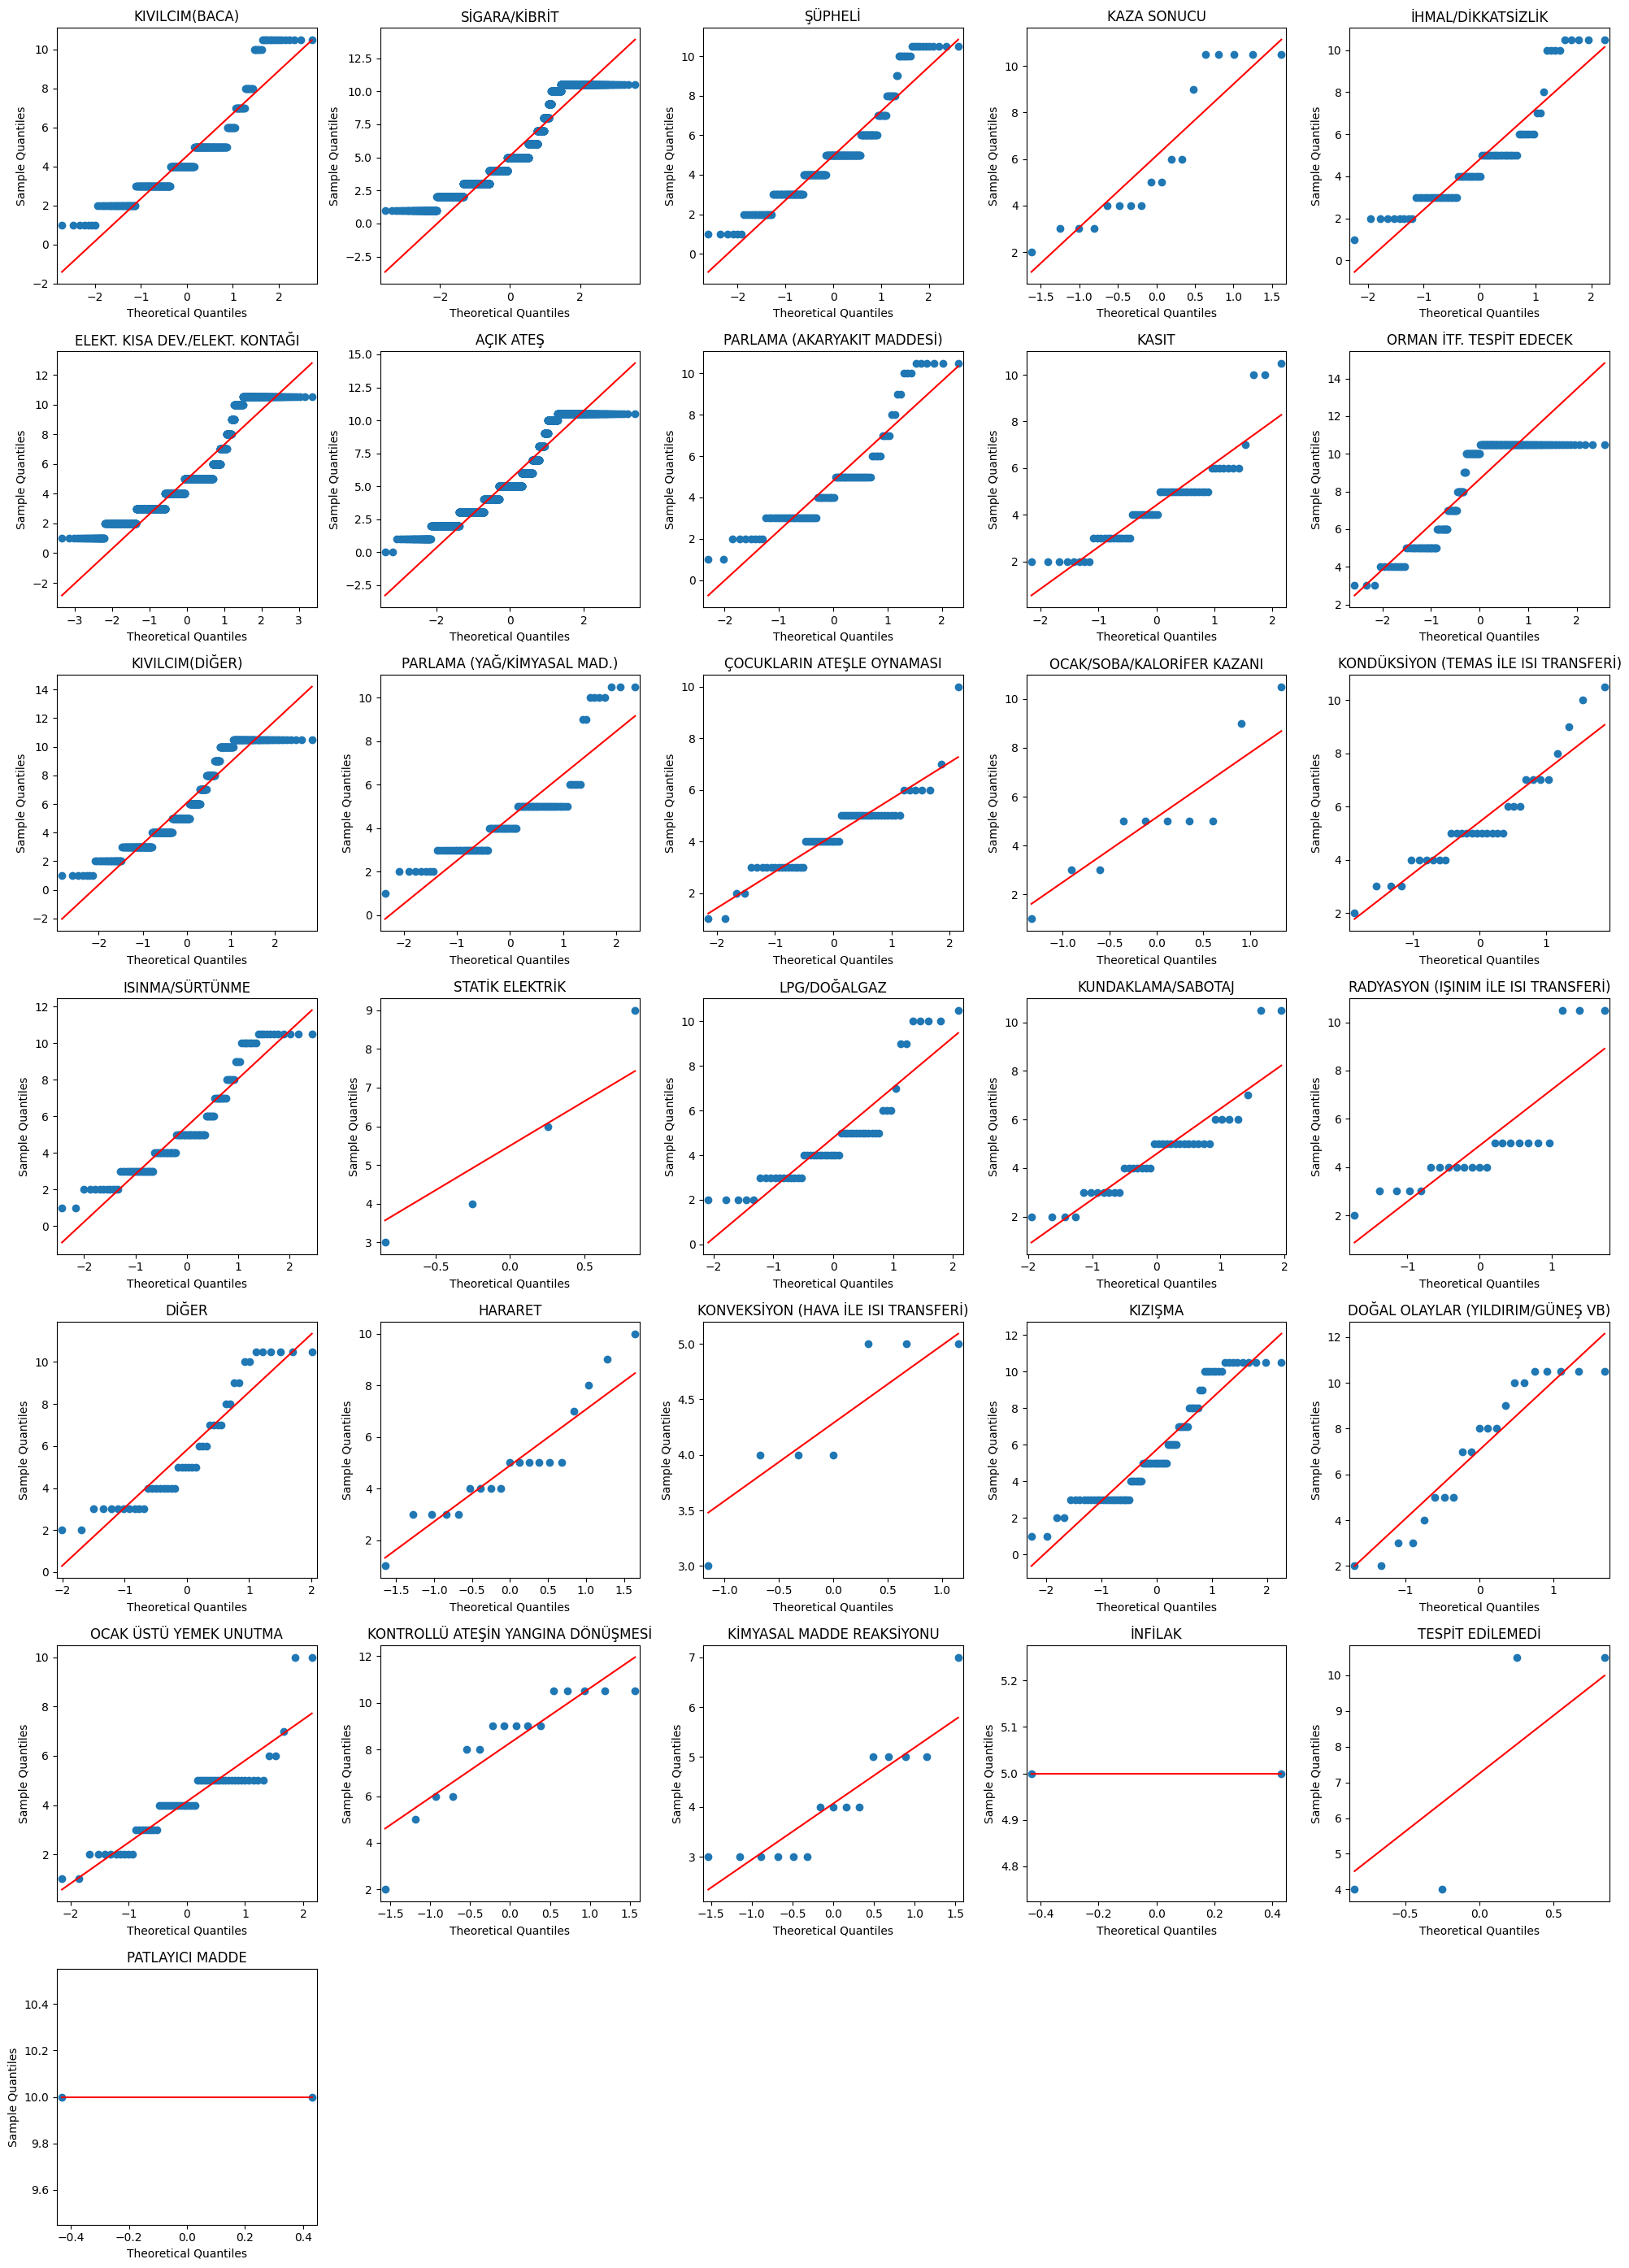

In [45]:
factors = ["season", "adres_bolgesi", "yangin_sebebi̇"]

for factor in factors:
    print(f"QQ Plots for '{factor}' grouped by 'varis_suresi'")
    groups = dataset[factor].unique()
    n_groups = len(groups)


    n_cols = min(5, n_groups)
    n_rows = (n_groups + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, group_name in enumerate(groups):
        if i < len(axes):
            ax = axes[i]
            data = dataset[dataset[factor] == group_name]['varis_suresi'].dropna()

            if len(data) > 0:
                sm.qqplot(data, line='s', ax=ax)
                ax.set_title(f'{group_name}')
            else:
                ax.set_title(f'{group_name} (No Data)')
                ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)



    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

* According to the Shapiro-Wilk test results and Q-Q Plots:
  - None of the main groups (season, address region, fire cause) have normally distributed arrival_time values (except for a few with very small sample sizes).

  - All major groups have p-values < 0.05, which means we reject the null hypothesis of normality.

Therefore, Kruskal-Wallis H-Test as a non-parametric alternative was used.

In [46]:
def run_kruskal_test(data, group_var, target_var):
    groups = [group[target_var].dropna().values for name, group in data.groupby(group_var) if len(group) >= 3]
    stat, p = kruskal(*groups)
    return stat, p


kruskal_results = {}
for factor in ['season', 'adres_bolgesi', 'yangin_sebebi̇']:
    stat, p = run_kruskal_test(dataset, factor, 'varis_suresi')
    kruskal_results[factor] = {'H-statistic': stat, 'p-value': p}


for factor, result in kruskal_results.items():
    print(f"Kruskal-Wallis Test for '{factor}':")
    print(f"  H-statistic: {result['H-statistic']}")
    print(f"  p-value: {result['p-value']}")
    print("-" * 20)


Kruskal-Wallis Test for 'season':
  H-statistic: 96.52201466102925
  p-value: 8.693518586558774e-21
--------------------
Kruskal-Wallis Test for 'adres_bolgesi':
  H-statistic: 3312.805241924955
  p-value: 0.0
--------------------
Kruskal-Wallis Test for 'yangin_sebebi̇':
  H-statistic: 472.8348480189745
  p-value: 2.5895283285010183e-82
--------------------


* According to the result of Kruskal-Wallis test, since p-values extremely small, the null hypothesis can be easily rejected. Therefore, it can be said that there are
statistically significant differences in arrival times across seasons, address regions, and fire causes.





## 5. Research Question-2: Classification and Regression
 * Q2: Is it possible to predict the outcome and resource requirements of a fire based on its cause, location, and arrival time?

* To answer the second research question both classification and regression tasks are required. Therefore, subquestions were developed.
  For the Classification Task:
    1. Is it possible to predict fire outcome based on fire causes?
    2. Is it possible to predict fire outcome based on fire location?
    3. Is it possible to predict fire outcome based on arrival time?

  For the Regression Task:
    1. Is it possible to predict resource requirements (amount of water) based on fire causes?
    2. Is it possible to predict resource requirements (amount of water) based on fire location?
    3. Is it possible to predict resource requirements (amount of water) based on arrival time?

In [47]:
X_train.isna().sum()

,0
yangin_turu,0
yangin_sebebi̇,0
erkek_vefat,0
kadin_vefat,0
itfaiyeci_vefat,0
erkek_yarali,0
kadin_yarali,0
itfaiyeci_yarali,0
buyuk_bas_vefat,0
kucuk_bas_vefat,0


In [48]:
features = [
    "ilce",
    "yangin_sebebi̇",
    "varis_suresi",
    "adres_bolgesi"
]

X_train_selected = X_train[features]
X_test_selected = X_test[features]
y_train_selected= y_train
y_test_selected = y_test

models = {
    "Random Forest": RandomForestClassifier(random_state=2543460),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=2543460)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_selected, y_train_selected)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test_selected, preds)
    f1_macro = f1_score(y_test_selected, preds, average='macro')
    f1_micro = f1_score(y_test_selected, preds, average='micro')
    f1_weighted = f1_score(y_test_selected, preds, average='weighted')
    precision = precision_score(y_test_selected, preds, average='macro', zero_division=0)
    recall = recall_score(y_test_selected, preds, average='macro', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Macro": round(f1_macro, 4),
        "F1 Micro": round(f1_micro, 4),
        "F1 Weighted": round(f1_weighted, 4),
        "Precision Macro": round(precision, 4),
        "Recall Macro": round(recall, 4)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Macro", ascending=False).reset_index(drop=True)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:53:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,F1 Macro,F1 Micro,F1 Weighted,Precision Macro,Recall Macro
0,Random Forest,0.8984,0.3973,0.8984,0.8783,0.4408,0.3835
1,k-NN (k=5),0.8995,0.3748,0.8995,0.8753,0.4470,0.3671
2,XGBoost,0.9053,0.3640,0.9053,0.8768,0.4330,0.3574
3,Naive Bayes,0.9149,0.3185,0.9149,0.8743,0.3050,0.3333
4,Logistic Regression,0.9149,0.3185,0.9149,0.8743,0.3050,0.3333
5,Dummy,0.9149,0.3185,0.9149,0.8743,0.3050,0.3333
6,ANN,0.9149,0.3185,0.9149,0.8743,0.3050,0.3333


* For the classification tasks, Random Forest Classifier, Logistic Regression, Naive Bayes, XGBoost,Dummy Classifier, k-NN and ANN models were developed to try different models. With this approach,  comprehensive comparison across model families was aimed:

    -Tree-based ensemble (Random Forest, XGBoost),

    -Instance-based (k-NN),

    -Neural-based (ANN),

    -Baseline (Dummy).

*A diverse set of regression models was selected: Linear Regression as a simple benchmark for linear relationships, Dummy Regressor as a naive baseline, Random Forest and Gradient Boosting for capturing non-linear patterns with feature importance, XGBoost for its regularized, high-performance boosting capabilities, ANN for modeling hidden nonlinear interactions, Support Vector Regression for its robustness to outliers and its suitability for noisy real-world datasets , and k-NN for learning based on local similarity.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:54:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


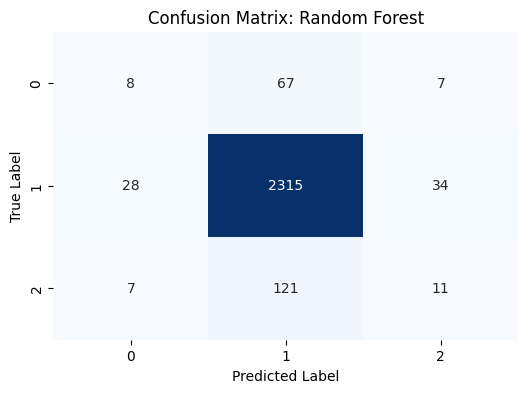

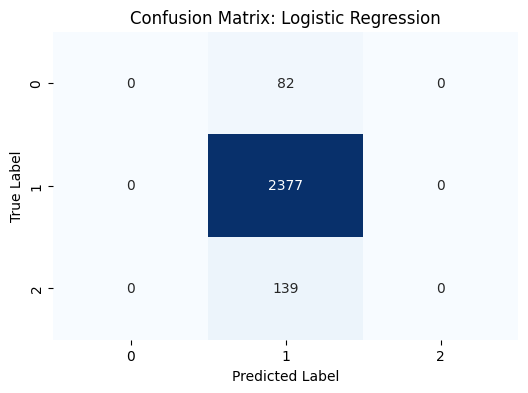

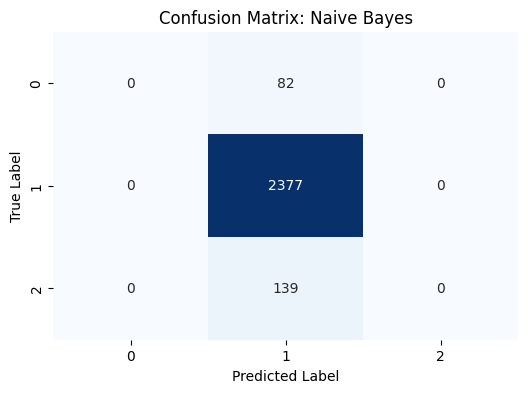

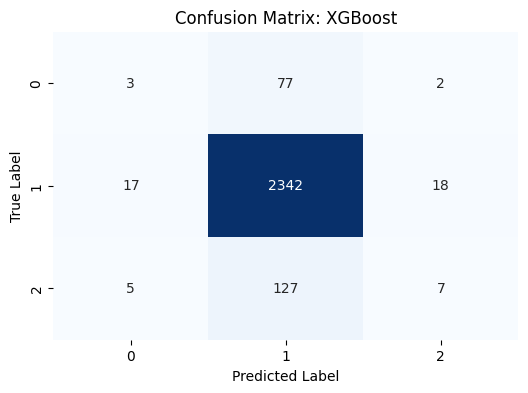

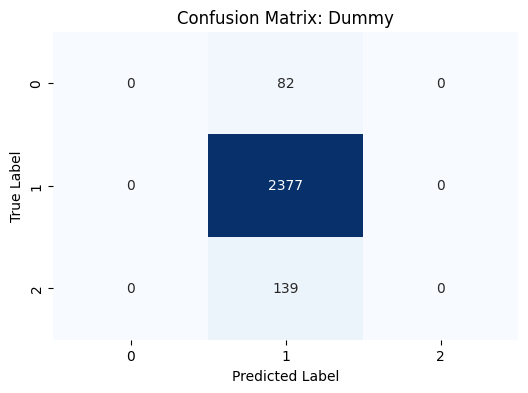

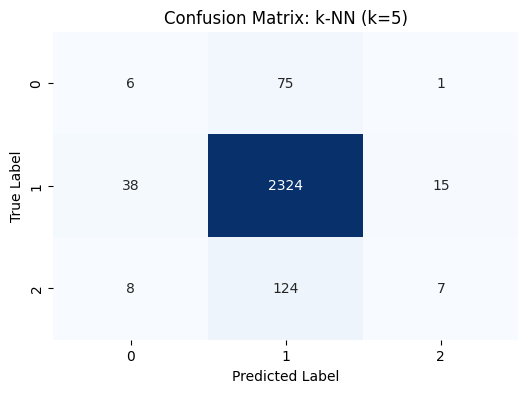

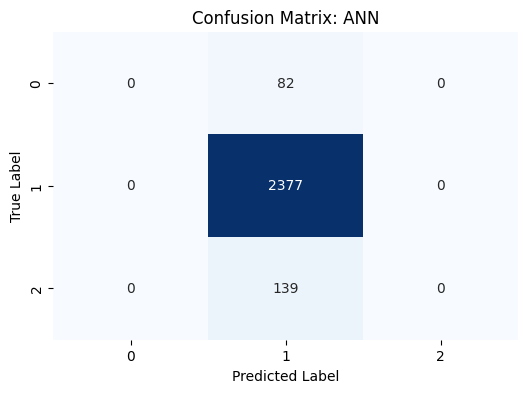

Comparing Predictions on a few test samples:
      True Label  Random Forest_Pred  Logistic Regression_Pred  \
861          1.0                 1.0                       1.0   
240          2.0                 1.0                       1.0   
1351         1.0                 1.0                       1.0   
355          1.0                 1.0                       1.0   
2215         1.0                 1.0                       1.0   

      Naive Bayes_Pred  XGBoost_Pred  Dummy_Pred  k-NN (k=5)_Pred  ANN_Pred  
861                1.0             1         1.0              1.0       1.0  
240                1.0             1         1.0              1.0       1.0  
1351               1.0             1         1.0              1.0       1.0  
355                1.0             1         1.0              1.0       1.0  
2215               1.0             1         1.0              1.0       1.0  


In [49]:
models = {
    "Random Forest": RandomForestClassifier(random_state=2543460),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=2543460)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train_selected)
    preds = model.predict(X_test_selected)
    predictions[name] = preds

for name, preds in predictions.items():
    cm = confusion_matrix(y_test_selected, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

print("Comparing Predictions on a few test samples:")
comparison_df = pd.DataFrame({
    'True Label': y_test_selected.reset_index(drop=True)
})
for name, preds in predictions.items():
    comparison_df[name + '_Pred'] = preds

print(comparison_df.sample(5))

In [50]:
y_train_regression = X_train['logscale_kullanilan_su_miktari_(m³)']
y_test_regression = X_test['logscale_kullanilan_su_miktari_(m³)']

regressors = {
    "Random Forest": RandomForestRegressor(random_state=2543460),
    "XGBoost": XGBRegressor(random_state=2543460, verbosity=0),
    "Linear Regression": LinearRegression(),
    "Dummy Regressor": DummyRegressor(strategy="mean"),
    "ANN Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=2543460),
    "SVR (RBF Kernel)": make_pipeline(StandardScaler(), SVR(kernel='rbf')),
    "Gradient Boosting": GradientBoostingRegressor(random_state=2543460),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
}

regression_results = []

for name, model in regressors.items():
    model.fit(X_train_selected, y_train_regression)
    preds = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test_regression, preds)
    rmse = np.sqrt(mean_squared_error(y_test_regression, preds))
    r2 = r2_score(y_test_regression, preds)

    regression_results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4)
    })

regression_results_df = pd.DataFrame(regression_results)
regression_results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)

,Model,MAE,RMSE,R² Score
0,Gradient Boosting,0.5256,0.7567,0.1815
1,ANN Regressor,0.5456,0.7785,0.1336
2,XGBoost,0.5396,0.7851,0.1188
3,Linear Regression,0.5555,0.7887,0.1107
4,SVR (RBF Kernel),0.5216,0.7925,0.1021
5,Random Forest,0.5580,0.8121,0.0572
6,K-Nearest Neighbors,0.5650,0.8178,0.0440
7,Dummy Regressor,0.6127,0.8364,-0.0000


In [51]:
best_regressor_name = regression_results_df.sort_values(by="R² Score", ascending=False).iloc[0]['Model']
best_regressor = regressors[best_regressor_name]

preds_best_regressor = best_regressor.predict(X_test_selected)

actuals_original_scale = np.expm1(y_test_regression)
predictions_original_scale = np.expm1(preds_best_regressor)

comparison_df = pd.DataFrame({
    'Actual Water Amount (m³)': actuals_original_scale,
    'Predicted Water Amount (m³)': predictions_original_scale
})

print(f"Comparing the first 5 predictions with actuals (Original Scale) using {best_regressor_name}:")
print(comparison_df.head().to_markdown(numalign="left", stralign="left"))



Comparing the first 5 predictions with actuals (Original Scale) using Gradient Boosting:
|       | Actual Water Amount (m³)   | Predicted Water Amount (m³)   |
|:------|:---------------------------|:------------------------------|
| 3306  | 0.3                        | 0.602773                      |
| 2123  | 2.5                        | 2.9719                        |
| 12562 | 2                          | 1.17927                       |
| 5011  | 8                          | 2.59368                       |
| 1226  | 0.5                        | 1.17793                       |


## 6. Hyperparameter Tuning

In [52]:
param_grid_rf_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb_reg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_gb_reg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

regressors_to_tune = {
    "Random Forest Regressor": (RandomForestRegressor(random_state=2543460), param_grid_rf_reg),
    "XGBoost Regressor": (XGBRegressor(random_state=2543460, verbosity=0), param_grid_xgb_reg),
    "Gradient Boosting Regressor": (GradientBoostingRegressor(random_state=2543460), param_grid_gb_reg)
}

tuned_regression_results = []
best_regressors = {}

for name, (model, param_grid) in regressors_to_tune.items():
    print(f"Tuning {name}...")

    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train_regression)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_

    preds = best_model.predict(X_test_selected)
    mae = mean_absolute_error(y_test_regression, preds)
    rmse = np.sqrt(mean_squared_error(y_test_regression, preds))
    r2 = r2_score(y_test_regression, preds)

    tuned_regression_results.append({
        "Model": f"{name} (Tuned)",
        "Best Params": best_params,
        "Cross-Validation MSE": round(best_score, 4),
        "Test MAE": round(mae, 4),
        "Test RMSE": round(rmse, 4),
        "Test R² Score": round(r2, 4)
    })
    best_regressors[name] = best_model

tuned_regression_results_df = pd.DataFrame(tuned_regression_results)
print("\n--- Tuned Regression Model Results (Grid Search) ---")
display(tuned_regression_results_df.sort_values(by="Test R² Score", ascending=False).reset_index(drop=True))


Tuning Random Forest Regressor...
Tuning XGBoost Regressor...
Tuning Gradient Boosting Regressor...

--- Tuned Regression Model Results (Grid Search) ---


,Model,Best Params,Cross-Validation MSE,Test MAE,Test RMSE,Test R² Score
0,XGBoost Regressor (Tuned),"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.5988,0.5243,0.7540,0.1873
1,Gradient Boosting Regressor (Tuned),"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.6021,0.5284,0.7585,0.1775
2,Random Forest Regressor (Tuned),"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.6093,0.5265,0.7618,0.1703


In [53]:
param_grid_rf_clf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

param_grid_xgb_clf = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'use_label_encoder': [False],
    'eval_metric': ['mlogloss']
}

param_grid_lr_clf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

param_grid_knn_clf = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_ann_clf = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

classifiers_to_tune = {
    "Random Forest Classifier": (RandomForestClassifier(random_state=2543460), param_grid_rf_clf),
    "XGBoost Classifier": (XGBClassifier(random_state=2543460), param_grid_xgb_clf),
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=2543460), param_grid_lr_clf),
    "k-NN Classifier": (KNeighborsClassifier(), param_grid_knn_clf),
    "ANN Classifier": (MLPClassifier(max_iter=1000, random_state=2543460), param_grid_ann_clf)
}

tuned_classification_results = []
best_classifiers = {}

n_iter_search = 50

for name, (model, param_grid) in classifiers_to_tune.items():
    print(f"\nTuning {name}...")


    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter_search, cv=3, scoring='f1_macro', random_state=2543460, n_jobs=-1)
    random_search.fit(X_train_selected, y_train_selected)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    preds = best_model.predict(X_test_selected)
    acc = accuracy_score(y_test_selected, preds)
    f1_macro = f1_score(y_test_selected, preds, average='macro')
    f1_micro = f1_score(y_test_selected, preds, average='micro')
    f1_weighted = f1_score(y_test_selected, preds, average='weighted')
    precision = precision_score(y_test_selected, preds, average='macro', zero_division=0)
    recall = recall_score(y_test_selected, preds, average='macro', zero_division=0)


    tuned_classification_results.append({
        "Model": f"{name} (Tuned)",
        "Best Params": best_params,
        "Cross-Validation F1 Macro": round(best_score, 4),
        "Test Accuracy": round(acc, 4),
        "Test F1 Macro": round(f1_macro, 4),
        "Test F1 Micro": round(f1_micro, 4),
        "Test F1 Weighted": round(f1_weighted, 4),
        "Test Precision Macro": round(precision, 4),
        "Test Recall Macro": round(recall, 4)
    })
    best_classifiers[name] = best_model

tuned_classification_results_df = pd.DataFrame(tuned_classification_results)
print("\n--- Tuned Classification Model Results (Random Search) ---")
display(tuned_classification_results_df.sort_values(by="Test F1 Macro", ascending=False).reset_index(drop=True))


Tuning Random Forest Classifier...

Tuning XGBoost Classifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Tuning Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Tuning k-NN Classifier...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Tuning ANN Classifier...

--- Tuned Classification Model Results (Random Search) ---


,Model,Best Params,Cross-Validation F1 Macro,Test Accuracy,Test F1 Macro,Test F1 Micro,Test F1 Weighted,Test Precision Macro,Test Recall Macro
0,Random Forest Classifier (Tuned),"{'n_estimators': 300, 'min_samples_split': 2, ...",0.4015,0.7117,0.3830,0.7117,0.7822,0.3879,0.4778
1,k-NN Classifier (Tuned),"{'weights': 'uniform', 'n_neighbors': 3, 'metr...",0.3776,0.8895,0.3828,0.8895,0.8726,0.4066,0.3791
2,XGBoost Classifier (Tuned),"{'use_label_encoder': False, 'subsample': 0.8,...",0.3753,0.9026,0.3643,0.9026,0.8757,0.4134,0.3581
3,Logistic Regression (Tuned),"{'solver': 'liblinear', 'penalty': 'l2', 'clas...",0.3201,0.9145,0.3185,0.9145,0.8741,0.3050,0.3332
4,ANN Classifier (Tuned),"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.3237,0.9149,0.3185,0.9149,0.8743,0.3050,0.3333


In [54]:
print("\n--- Summary of Best Tuned Regression Models ---")
display(tuned_regression_results_df.sort_values(by="Test R² Score", ascending=False).iloc[0].to_frame().T)

print("\n--- Summary of Best Tuned Classification Models ---")
display(tuned_classification_results_df.sort_values(by="Test F1 Macro", ascending=False).iloc[0].to_frame().T)


--- Summary of Best Tuned Regression Models ---


,Model,Best Params,Cross-Validation MSE,Test MAE,Test RMSE,Test R² Score
1,XGBoost Regressor (Tuned),"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.5988,0.5243,0.754,0.1873



--- Summary of Best Tuned Classification Models ---


,Model,Best Params,Cross-Validation F1 Macro,Test Accuracy,Test F1 Macro,Test F1 Micro,Test F1 Weighted,Test Precision Macro,Test Recall Macro
0,Random Forest Classifier (Tuned),"{'n_estimators': 300, 'min_samples_split': 2, ...",0.4015,0.7117,0.383,0.7117,0.7822,0.3879,0.4778


* Two tuning strategies were developed:

    -GridSearchCV for regression models, and RandomizedSearchCV for classification models to see the effect of both of them.

    -3-fold cross-validation (cv=3) was used to ensure each model was trained and validated on different data splits. Thhus, it was aimed to prevent overfitting and estimate the model’s generalization ability.

    -A validation dataset was not separately used. Instead, cross-validation internally acted as the validation approach for hyperparameter tuning.

* Based on the results, best tuned regression model was XGBoost Regressor, and best tuned classification model was Random Forest Classifier.

## 7. Interpretability with Feature Importance and Permutation Importance

* To interpret how input features influence model predictions, both tree-based feature importance and model-agnostic permutation importance were applied. Feature importance, available in models like Random Forest and XGBoost, offers fast and integrated insights but may introduce bias. To address this, permutation importance was used as a robust alternative that evaluates the impact of each feature by measuring the performance drop when it is shuffled. Thus, ensuring reliable and interpretable results across both classification and regression tasks were aimed.  


--- Feature Importance for Best Tuned Classification Model: Random Forest Classifier ---
Tree-based Feature Importance:


,Feature,Importance
1,yangin_sebebi̇,0.424512
0,ilce,0.322389
2,varis_suresi,0.206051
3,adres_bolgesi,0.047048


<ipython-input-55-1bb1607432b1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_tuned_df, palette='viridis')


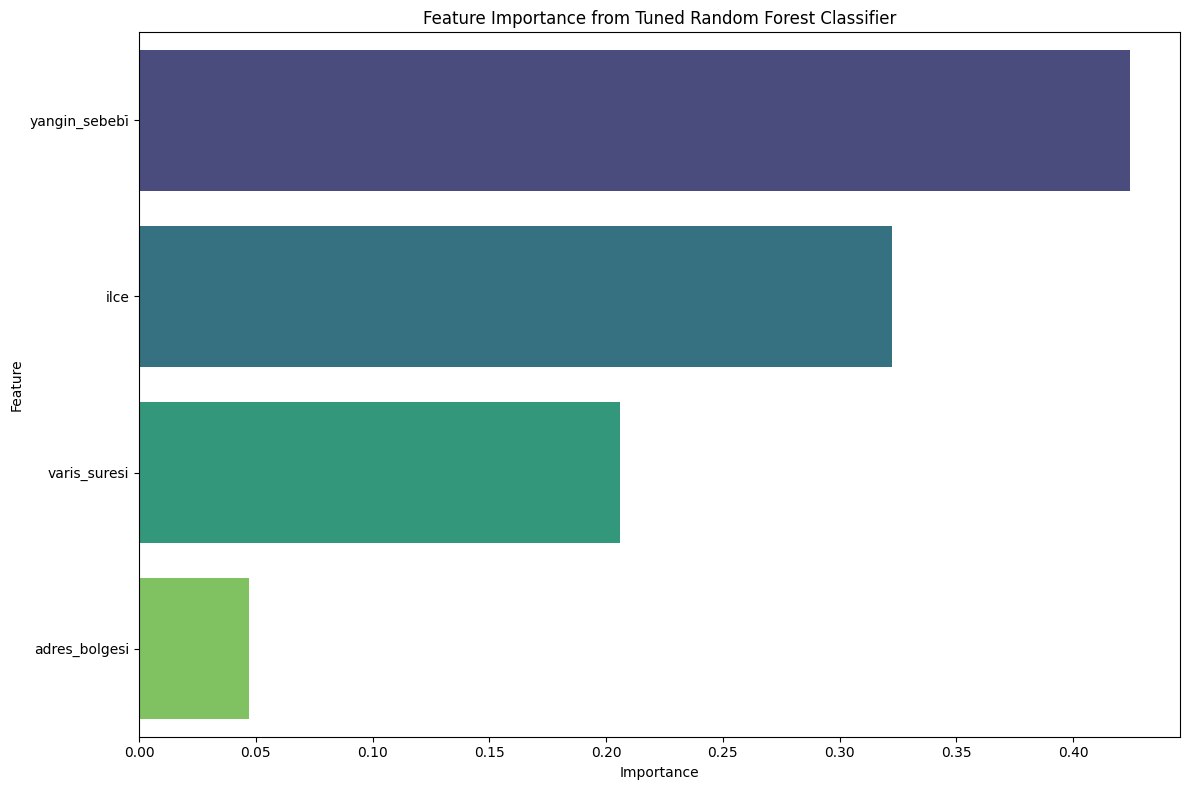


--- Permutation Importance for Best Tuned Classification Model: Random Forest Classifier ---
Permutation Importance (scored by f1_macro):


,Feature,Mean Decrease in Metric,Standard Deviation
1,yangin_sebebi̇,0.067343,0.006727
3,adres_bolgesi,-0.012787,0.004187
2,varis_suresi,-0.015451,0.007180
0,ilce,-0.017855,0.007070


<ipython-input-55-1bb1607432b1>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Decrease in Metric', y='Feature', data=perm_importance_df, palette='viridis')


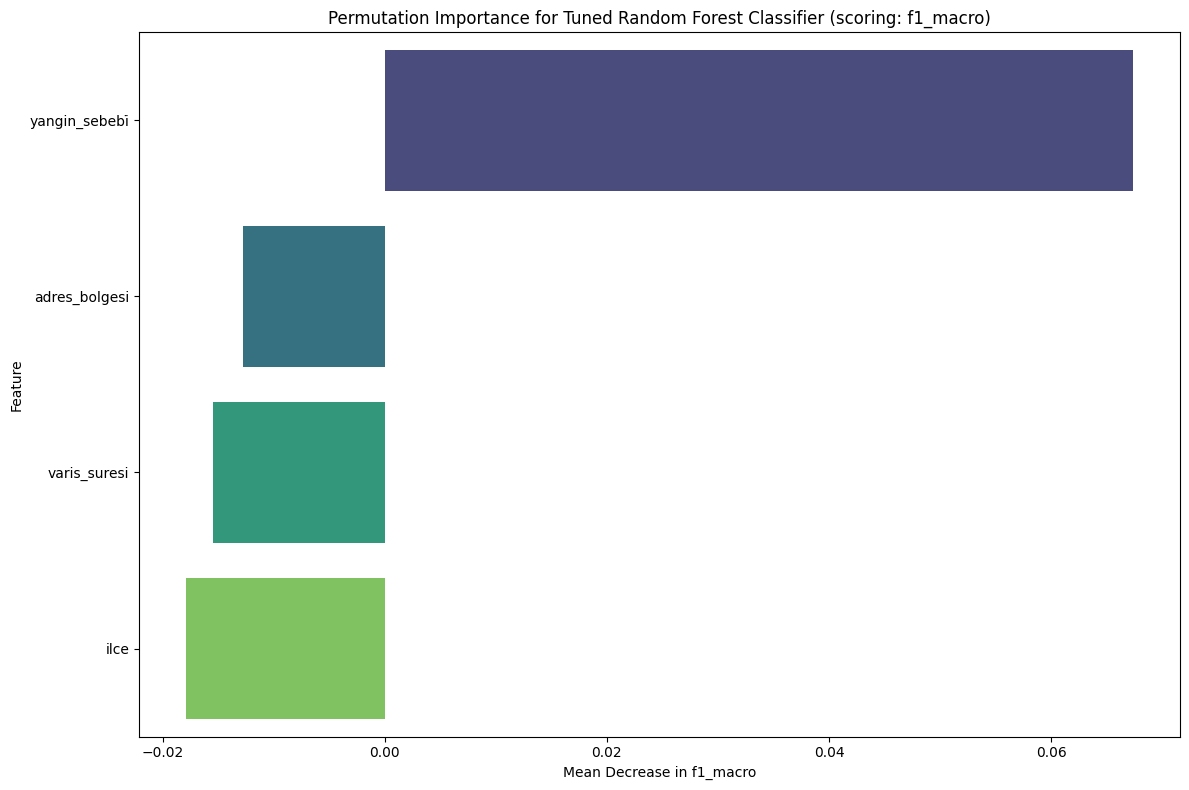

In [55]:
best_clf_name = tuned_classification_results_df.sort_values(by="Test F1 Macro", ascending=False).iloc[0]['Model'].replace(" (Tuned)", "")
best_classifier_tuned = best_classifiers[best_clf_name]

print(f"\n--- Feature Importance for Best Tuned Classification Model: {best_clf_name} ---")

importances_tuned = best_classifier_tuned.feature_importances_
feature_importance_tuned_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances_tuned
})
feature_importance_tuned_df = feature_importance_tuned_df.sort_values(by='Importance', ascending=False)
print("Tree-based Feature Importance:")
display(feature_importance_tuned_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tuned_df, palette='viridis')
plt.title(f'Feature Importance from Tuned {best_clf_name}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(f"\n--- Permutation Importance for Best Tuned Classification Model: {best_clf_name} ---")

scoring_metric = 'f1_macro'
result = permutation_importance(best_classifier_tuned, X_test_selected, y_test_selected, n_repeats=10, random_state=2543460, n_jobs=-1, scoring=scoring_metric)

perm_importance_df = pd.DataFrame({
    'Feature': X_test_selected.columns,
    'Mean Decrease in Metric': result.importances_mean,
    'Standard Deviation': result.importances_std
})

perm_importance_df = perm_importance_df.sort_values(by='Mean Decrease in Metric', ascending=False)

print(f"Permutation Importance (scored by {scoring_metric}):")
display(perm_importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Decrease in Metric', y='Feature', data=perm_importance_df, palette='viridis')
plt.title(f'Permutation Importance for Tuned {best_clf_name} (scoring: {scoring_metric})')
plt.xlabel(f'Mean Decrease in {scoring_metric}')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--- Feature Importance for Best Tuned Regression Model: XGBoost Regressor ---
Tree-based Feature Importance (Regression):


,Feature,Importance
3,adres_bolgesi,0.706201
1,yangin_sebebi̇,0.124853
2,varis_suresi,0.110323
0,ilce,0.058624


<ipython-input-56-d9d6452632ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_reg_tuned_df, palette='viridis')


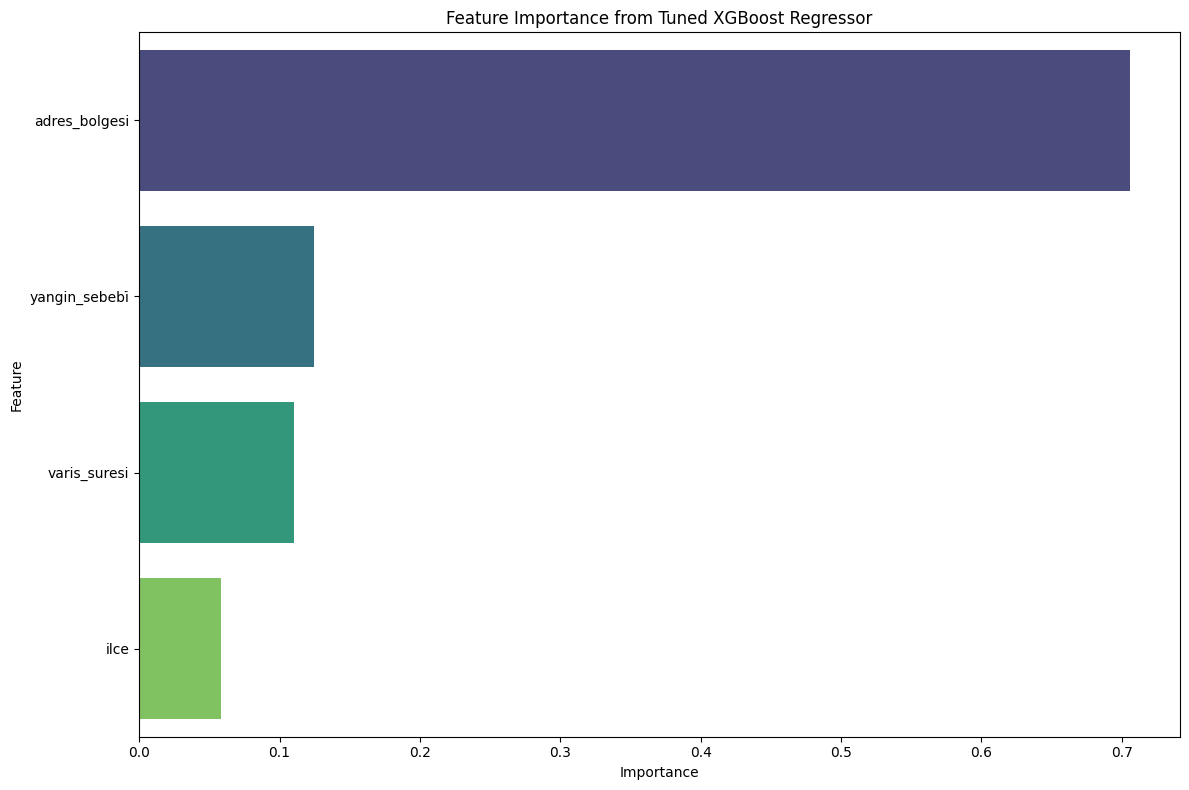


--- Permutation Importance for Best Tuned Regression Model: XGBoost Regressor ---
Permutation Importance (scored by r2):


,Feature,Mean Decrease in Metric,Standard Deviation
1,yangin_sebebi̇,0.104393,0.007177
3,adres_bolgesi,0.088726,0.006719
0,ilce,0.030048,0.003592
2,varis_suresi,0.022861,0.003980


<ipython-input-56-d9d6452632ad>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Decrease in Metric', y='Feature', data=perm_importance_reg_df, palette='viridis')


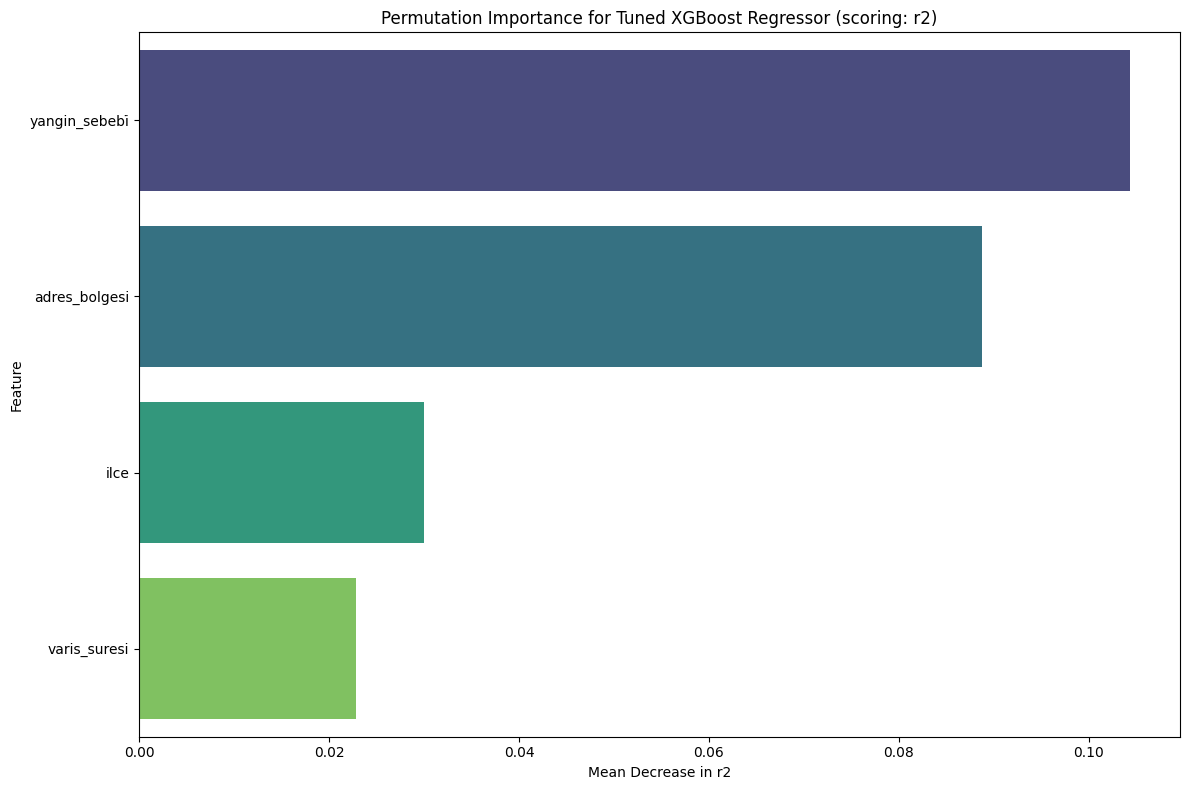

In [56]:
best_reg_name = tuned_regression_results_df.sort_values(by="Test R² Score", ascending=False).iloc[0]['Model'].replace(" (Tuned)", "")
best_regressor_tuned = best_regressors[best_reg_name]

print(f"\n--- Feature Importance for Best Tuned Regression Model: {best_reg_name} ---")

importances_reg_tuned = best_regressor_tuned.feature_importances_
feature_importance_reg_tuned_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances_reg_tuned
})
feature_importance_reg_tuned_df = feature_importance_reg_tuned_df.sort_values(by='Importance', ascending=False)
print("Tree-based Feature Importance (Regression):")
display(feature_importance_reg_tuned_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_reg_tuned_df, palette='viridis')
plt.title(f'Feature Importance from Tuned {best_reg_name}')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(f"\n--- Permutation Importance for Best Tuned Regression Model: {best_reg_name} ---")

scoring_metric_reg = 'r2'
result_reg = permutation_importance(best_regressor_tuned, X_test_selected, y_test_regression, n_repeats=10, random_state=2543460, n_jobs=-1, scoring=scoring_metric_reg)

perm_importance_reg_df = pd.DataFrame({
    'Feature': X_test_selected.columns,
    'Mean Decrease in Metric': result_reg.importances_mean,
    'Standard Deviation': result_reg.importances_std
})

perm_importance_reg_df = perm_importance_reg_df.sort_values(by='Mean Decrease in Metric', ascending=False)

print(f"Permutation Importance (scored by {scoring_metric_reg}):")
display(perm_importance_reg_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Decrease in Metric', y='Feature', data=perm_importance_reg_df, palette='viridis')
plt.title(f'Permutation Importance for Tuned {best_reg_name} (scoring: {scoring_metric_reg})')
plt.xlabel(f'Mean Decrease in {scoring_metric_reg}')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

* The classification model primarily relies on fire cause to predict outcome severity. ilce and varis_suresi follow, while adres_bolgesi has the lowest contribution. When permutation importance was evaluated, yangin_sebebi̇ still shows the highest impact on F1 macro score. The other features show close-to-zero or even slightly negative impact, suggesting they might not improve prediction significantly beyond noise.
* The regression model primarily relies on adres_bolgesi, contributing over 70% of the model's learned importance. yangin_sebebi̇ and varis_suresi seems like moderately important. ilce is the least used feature in tree splits. When permutation importance was evaluated, yangin_sebebi̇ has the largest actual impact on predictive performance. adres_bolgesi follows, which aligns with the tree-based view but not as dominantly. ilce and varis_suresi have mild but positive impact.
While XGBoost’s tree structure prioritized adres_bolgesi, actual model performance (via permutation) suggests yangin_sebebi̇ is more critical for accurate generalization. This highlights the difference between model-internal decision paths.

## 8. Comparison of Tuned Models with Baseline Models

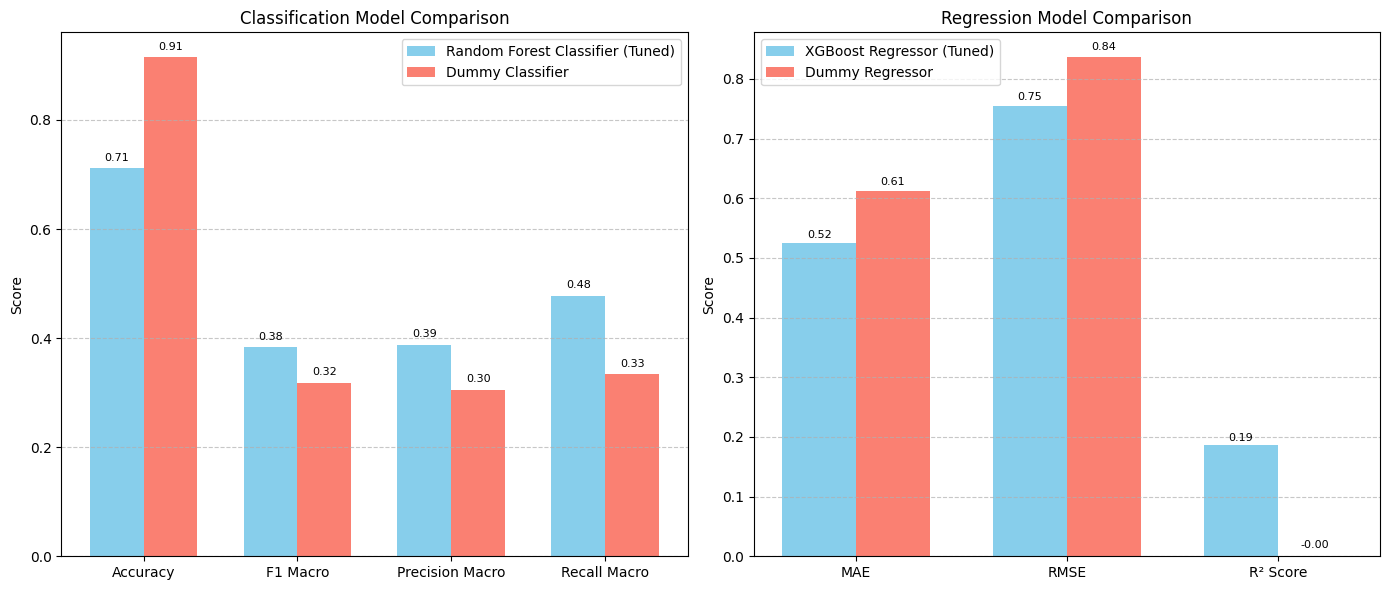

In [57]:
dummy_clf = DummyClassifier()
dummy_reg = DummyRegressor()

dummy_clf.fit(X_train_selected, y_train_selected)
dummy_reg.fit(X_train_selected, y_train_regression)

preds_dummy_clf = dummy_clf.predict(X_test_selected)
preds_dummy_reg = dummy_reg.predict(X_test_selected)

best_clf_name_tuned = tuned_classification_results_df.sort_values(by="Test F1 Macro", ascending=False).iloc[0]['Model'].replace(" (Tuned)", "")
best_reg_name_tuned = tuned_regression_results_df.sort_values(by="Test R² Score", ascending=False).iloc[0]['Model'].replace(" (Tuned)", "")

best_classifier_tuned = best_classifiers[best_clf_name_tuned]
best_regressor_tuned = best_regressors[best_reg_name_tuned]

preds_best_clf_tuned = best_classifier_tuned.predict(X_test_selected)
preds_best_reg_tuned = best_regressor_tuned.predict(X_test_selected)


acc_tuned_clf = accuracy_score(y_test_selected, preds_best_clf_tuned)
f1_macro_tuned_clf = f1_score(y_test_selected, preds_best_clf_tuned, average='macro')
precision_tuned_clf = precision_score(y_test_selected, preds_best_clf_tuned, average='macro', zero_division=0)
recall_tuned_clf = recall_score(y_test_selected, preds_best_clf_tuned, average='macro', zero_division=0)


acc_dummy_clf = accuracy_score(y_test_selected, preds_dummy_clf)
f1_macro_dummy_clf = f1_score(y_test_selected, preds_dummy_clf, average='macro', zero_division=0)
precision_dummy_clf = precision_score(y_test_selected, preds_dummy_clf, average='macro', zero_division=0)
recall_dummy_clf = recall_score(y_test_selected, preds_dummy_clf, average='macro', zero_division=0)

classification_metrics_tuned = [acc_tuned_clf, f1_macro_tuned_clf, precision_tuned_clf, recall_tuned_clf]
classification_metrics_dummy = [acc_dummy_clf, f1_macro_dummy_clf, precision_dummy_clf, recall_dummy_clf]
classification_metric_names = ['Accuracy', 'F1 Macro', 'Precision Macro', 'Recall Macro']

mae_tuned_reg = mean_absolute_error(y_test_regression, preds_best_reg_tuned)
rmse_tuned_reg = np.sqrt(mean_squared_error(y_test_regression, preds_best_reg_tuned))
r2_tuned_reg = r2_score(y_test_regression, preds_best_reg_tuned)

mae_dummy_reg = mean_absolute_error(y_test_regression, preds_dummy_reg)
rmse_dummy_reg = np.sqrt(mean_squared_error(y_test_regression, preds_dummy_reg))
r2_dummy_reg = r2_score(y_test_regression, preds_dummy_reg)

regression_metrics_tuned = [mae_tuned_reg, rmse_tuned_reg, r2_tuned_reg]
regression_metrics_dummy = [mae_dummy_reg, rmse_dummy_reg, r2_dummy_reg]
regression_metric_names = ['MAE', 'RMSE', 'R² Score']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
x_pos_clf = np.arange(len(classification_metric_names))
bar_width = 0.35

bars1_clf = axes[0].bar(x_pos_clf - bar_width/2, classification_metrics_tuned, bar_width, label=f'{best_clf_name_tuned} (Tuned)', color='skyblue')
bars2_clf = axes[0].bar(x_pos_clf + bar_width/2, classification_metrics_dummy, bar_width, label='Dummy Classifier', color='salmon')

axes[0].set_ylabel('Score')
axes[0].set_title('Classification Model Comparison')
axes[0].set_xticks(x_pos_clf)
axes[0].set_xticklabels(classification_metric_names)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars1_clf:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)
for bar in bars2_clf:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)



x_pos_reg = np.arange(len(regression_metric_names))

bars1_reg = axes[1].bar(x_pos_reg - bar_width/2, regression_metrics_tuned, bar_width, label=f'{best_reg_name_tuned} (Tuned)', color='skyblue')
bars2_reg = axes[1].bar(x_pos_reg + bar_width/2, regression_metrics_dummy, bar_width, label='Dummy Regressor', color='salmon')


axes[1].set_ylabel('Score')
axes[1].set_title('Regression Model Comparison')
axes[1].set_xticks(x_pos_reg)
axes[1].set_xticklabels(regression_metric_names)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)



for bar in bars1_reg:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + (0.01 * yval if yval > 0 else 0.01), f'{yval:.2f}', ha='center', va='bottom', fontsize=8)
for bar in bars2_reg:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + (0.01 * yval if yval > 0 else 0.01), f'{yval:.2f}', ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()

* When tuned Random Forest Classifier and XGBoost Regression models were compared, the dummy model shows higher accuracy (0.91) than the Random Forest (0.71), but this is misleading due to class imbalance since the dummy always guesses the majority class.

* In the F1 Macro, Precision Macro, Recall Macro scores, The Random Forest significantly outperforms the dummy model. It can be interpreted as the Random Forest model is clearly superior in capturing all classes fairly while the dummy classifier is only good at the majority class.

* When performances of regression models were evaluated, XGBoost model significantly reduces both absolute and squared errors, and importantly, achieves a positive R² score, indicating it captures some of the variance in the target. In contrast, the dummy model has no explanatory power (R² ≈ 0).


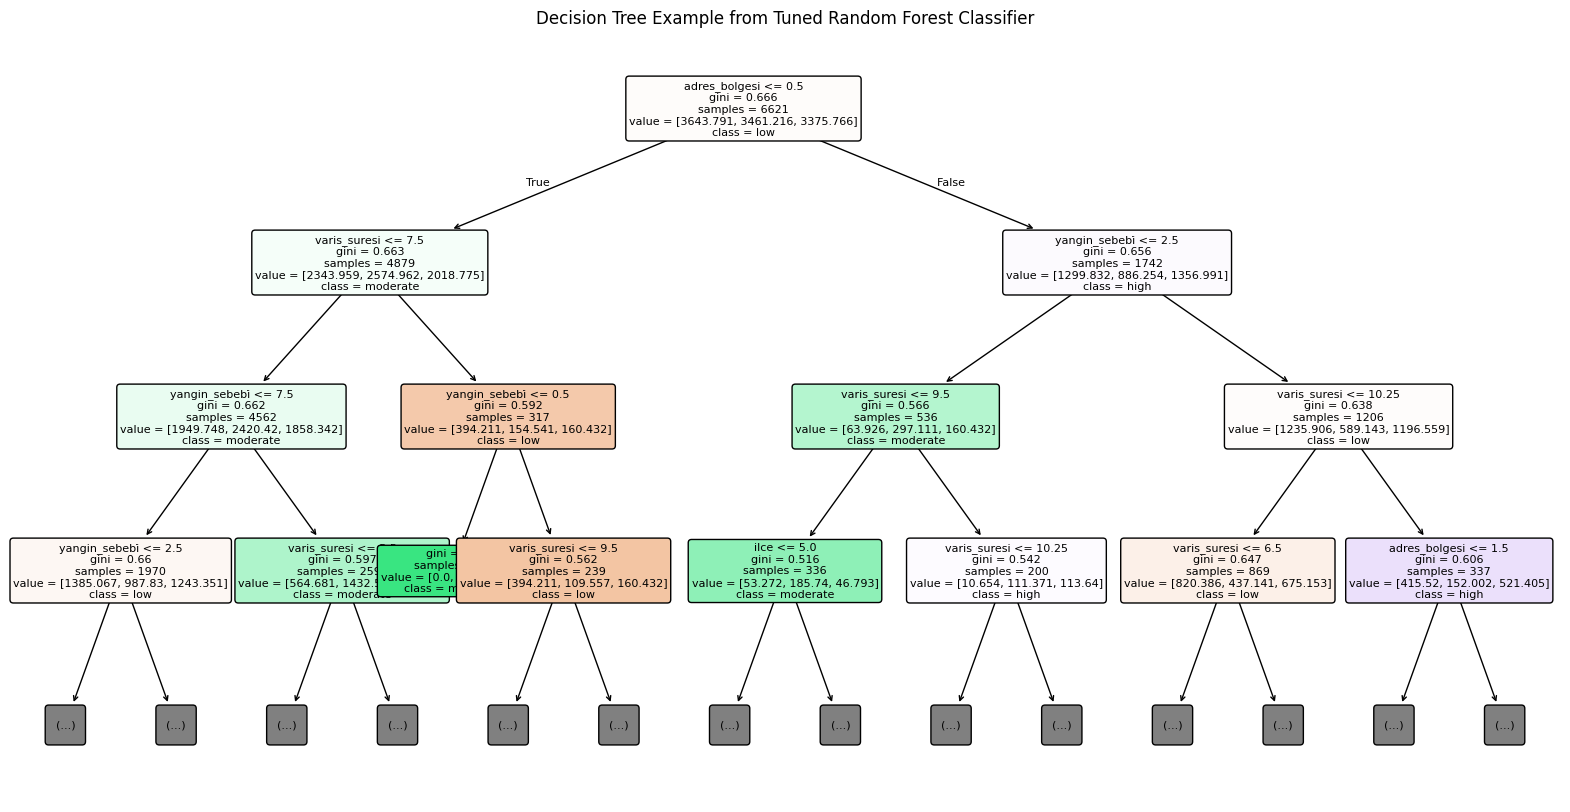

In [58]:
best_classifier_model = best_classifiers[best_clf_name_tuned]

plt.figure(figsize=(20, 10))
plot_tree(best_classifier_model.estimators_[0],
          feature_names=X_train_selected.columns.tolist(),
          class_names=['low', 'moderate', 'high'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)
plt.title(f'Decision Tree Example from Tuned {best_clf_name_tuned}')
plt.show()

In [59]:
preds_best_reg_tuned = best_regressor_tuned.predict(X_test_selected)
preds_dummy_reg = dummy_reg.predict(X_test_selected)

residuals_tuned = y_test_regression - preds_best_reg_tuned
residuals_dummy = y_test_regression - preds_dummy_reg

stat, p_value = mannwhitneyu(residuals_tuned, residuals_dummy, alternative='two-sided')

print(f"--- Mann-Whitney U Test on Regression Model Residuals ---")
print(f"Tuned Model: {best_reg_name_tuned}")
print(f"Baseline Model: Dummy Regressor")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


--- Mann-Whitney U Test on Regression Model Residuals ---
Tuned Model: XGBoost Regressor
Baseline Model: Dummy Regressor
U-statistic: 3551405.0
P-value: 0.0010782452948477062


* Based on the p-value, the null hypothesis can be easily rejected. Therefore, it can be said that tuned models are superior to baseline models.

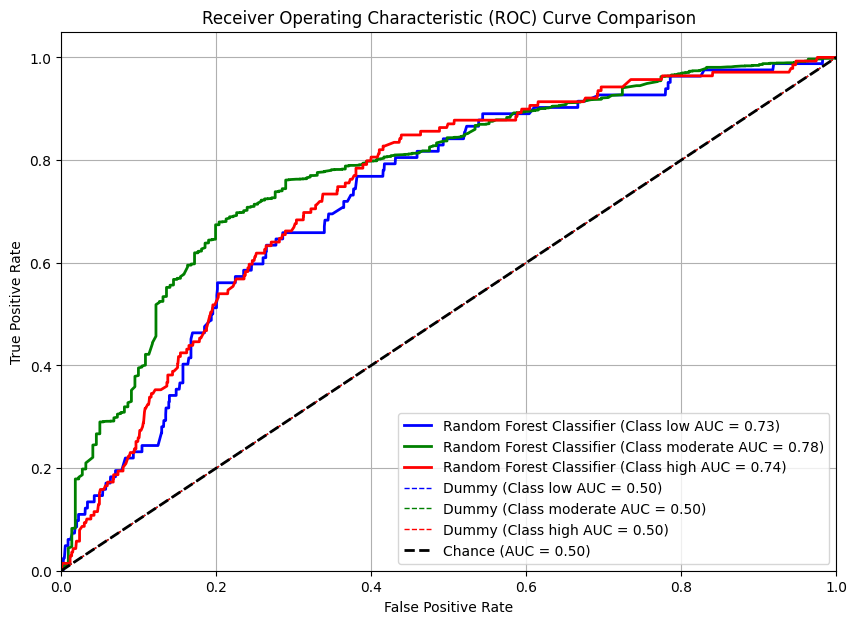

In [60]:
y_prob_tuned = best_classifier_tuned.predict_proba(X_test_selected)
y_prob_dummy = dummy_clf.predict_proba(X_test_selected)

classes = np.unique(y_test_selected)
y_test_binarized = label_binarize(y_test_selected, classes=classes)
n_classes = y_test_binarized.shape[1]

fpr_tuned = dict()
tpl_tuned = dict()
roc_auc_tuned = dict()
for i in range(n_classes):
    fpr_tuned[i], tpl_tuned[i], _ = roc_curve(y_test_binarized[:, i], y_prob_tuned[:, i])
    roc_auc_tuned[i] = auc(fpr_tuned[i], tpl_tuned[i])

fpr_dummy = dict()
tpl_dummy = dict()
roc_auc_dummy = dict()
for i in range(n_classes):
    fpr_dummy[i], tpl_dummy[i], _ = roc_curve(y_test_binarized[:, i], y_prob_dummy[:, i])
    roc_auc_dummy[i] = auc(fpr_dummy[i], tpl_dummy[i])

plt.figure(figsize=(10, 7))

colors = ['blue', 'green', 'red']
class_labels = ['low', 'moderate', 'high']

for i in range(n_classes):
    plt.plot(fpr_tuned[i], tpl_tuned[i], color=colors[i], lw=2,
             label=f'{best_clf_name_tuned} (Class {class_labels[i]} AUC = {roc_auc_tuned[i]:0.2f})')

for i in range(n_classes):
    plt.plot(fpr_dummy[i], tpl_dummy[i], color=colors[i], lw=1, linestyle='--',
             label=f'Dummy (Class {class_labels[i]} AUC = {roc_auc_dummy[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

* As a conclusion, for the first question, statistical tests
showed that arrival times significantly vary across seasons,
address regions, and fire causes.  For the second question, classification
models like Random Forest were able to predict fire outcomes
with moderate success using cause, location, and arrival time.
Regression models for predicting water use had weaker
results, although Gradient Boosting performed best among
them. These findings suggest that machine learning can help
estimate fire outcomes and resource needs, but better results
may be possible with more detailed data or additional features.